In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import lightgbm
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score

In [25]:
df = pd.read_csv('downloaded_from_mendeley/weaving_rejection_dataset - original.csv')

In [26]:
df.head()

,Construction,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Previous_pdn,Req_grey_fabric,Req_beam_length(yds),Total_Pdn(yds),Rejection,warp_count,weft_count,epi,ppi
0,40+40/2/40/110x80,31300.0,6.0,38286.9360,12.5,TOTAL,33297.872340,34797.651103,27646.0,285,double_40,80.0,110,80
1,40x40/110x90,10450.0,7.0,13057.5840,14.5,TOTAL,11236.559140,12017.350432,11019.0,39,40,40.0,110,90
2,40x40/110x80,900.0,11.5,1902.8640,12.5,TOTAL,1016.949153,1062.753843,1528.0,0,40,40.0,110,80
3,40x40/130x80,8000.0,8.0,10093.9280,14.0,TOTAL,8695.652174,9245.815159,8944.0,58,40,40.0,130,80
4,50x50/140x70,3500.0,8.1,69146.1408,9.1,TOTAL,3808.487486,3831.158751,59367.0,1043,50,50.0,140,70


In [27]:
df= df[['Req_Finish_Fabrics', 'Fabric_Allowance','Rec_Beam_length(yds)', 'Shrink_allow', 'Req_grey_fabric', 
    'Req_beam_length(yds)', 'warp_count',  'weft_count','epi', 'ppi', 'Rejection']]

In [28]:
df.head()

,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Req_grey_fabric,Req_beam_length(yds),warp_count,weft_count,epi,ppi,Rejection
0,31300.0,6.0,38286.9360,12.5,33297.872340,34797.651103,double_40,80.0,110,80,285
1,10450.0,7.0,13057.5840,14.5,11236.559140,12017.350432,40,40.0,110,90,39
2,900.0,11.5,1902.8640,12.5,1016.949153,1062.753843,40,40.0,110,80,0
3,8000.0,8.0,10093.9280,14.0,8695.652174,9245.815159,40,40.0,130,80,58
4,3500.0,8.1,69146.1408,9.1,3808.487486,3831.158751,50,50.0,140,70,1043


In [29]:
def label_encoding(x):
    def resultant_count(x1,x2):
        return int( (x1*x2)/(x1+x2) ) 
    if x == 'double_80':
        return resultant_count(80,80)
    elif x == 'double_40':
        return resultant_count(40,40)
    else:
        return int(x)

In [30]:
df['warp_count']= df['warp_count'].apply(lambda x: label_encoding(x))

In [31]:
X = df.copy()
y = X.pop('Rejection')

In [32]:
X.dtypes

Req_Finish_Fabrics      float64
Fabric_Allowance        float64
Rec_Beam_length(yds)    float64
Shrink_allow            float64
Req_grey_fabric         float64
Req_beam_length(yds)    float64
warp_count                int64
weft_count              float64
epi                       int64
ppi                       int64
dtype: object

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [35]:
X_train.head(2)

,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Req_grey_fabric,Req_beam_length(yds),warp_count,weft_count,epi,ppi
2569,250.0,22.0,382.760,23.0,320.512821,380.624009,40,40.0,110,90
2976,100.0,37.2,153.104,15.1,159.235669,171.503965,40,40.0,100,70


# scaling

In [36]:
from sklearn.preprocessing import StandardScaler
 
sc = StandardScaler()

In [37]:
X_train_sc = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

In [38]:
X_train_sc.index = X_train.index
X_test_sc.index = X_test.index

In [39]:
X_train_sc.head()

,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Req_grey_fabric,Req_beam_length(yds),warp_count,weft_count,epi,ppi
2569,-0.438371,3.496171,-0.360767,3.218992,-0.436927,-0.434815,-0.136190,-0.176576,-0.661352,0.862481
2976,-0.445170,7.619913,-0.370530,0.575475,-0.443708,-0.443216,-0.136190,-0.176576,-1.314825,-1.270987
13508,-0.234413,0.294845,-0.371227,1.211257,-0.228011,-0.216000,-0.136190,-0.176576,-0.007879,-0.204253
5169,-0.347723,-0.247752,-0.263374,-1.733420,-0.347354,-0.352028,1.343161,1.134750,1.952541,1.502521
15152,-0.352256,-0.247752,-0.263142,0.006616,-0.351934,-0.350760,1.343161,1.134750,0.645594,-0.204253


In [40]:
X_all = pd.concat([X_train_sc, X_test_sc], axis=0)

In [36]:
y_all = pd.concat([y_train, y_test], axis=0)

In [38]:
X_all.shape, y_all.shape

((22010, 10), (22010,))

In [41]:
#models
models = {'light_gbm': lightgbm.LGBMRegressor(), 'rnf': RandomForestRegressor() , 'cat': CatBoostRegressor(), 
          'xgboost': XGBRegressor(), 'lr': LinearRegression(), 'laso': Lasso(), 'elastonet': ElasticNet(),
         'elastonet_cv': ElasticNetCV(), 'ridge': Ridge(), 'decision_tree': DecisionTreeRegressor(),
          'knn': KNeighborsRegressor(), 'adaboost': AdaBoostRegressor(), 'svm': SVR()   } 

# r2 score calculation

In [19]:
from sklearn.metrics import r2_score
def calculate_r2_score(models, X_train, y_train, X_test):
    r2_dict ={}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2_score_ = r2_score(y_test, y_pred)
        r2_dict[model_name] = r2_score_
    return r2_dict

In [20]:
r2_dict_df=calculate_r2_score(models, X_train_sc, y_train, X_test_sc)

Learning rate set to 0.064417
0:	learn: 156.3724704	total: 141ms	remaining: 2m 21s
1:	learn: 149.3761625	total: 144ms	remaining: 1m 11s
2:	learn: 142.9982825	total: 147ms	remaining: 48.9s
3:	learn: 136.9923959	total: 150ms	remaining: 37.3s
4:	learn: 131.6024063	total: 152ms	remaining: 30.3s
5:	learn: 126.5181139	total: 154ms	remaining: 25.6s
6:	learn: 121.6926238	total: 157ms	remaining: 22.3s
7:	learn: 117.4234374	total: 160ms	remaining: 19.8s
8:	learn: 113.2950173	total: 162ms	remaining: 17.9s
9:	learn: 109.5807434	total: 165ms	remaining: 16.3s
10:	learn: 106.2495452	total: 167ms	remaining: 15s
11:	learn: 103.1258032	total: 170ms	remaining: 14s
12:	learn: 100.1517743	total: 172ms	remaining: 13.1s
13:	learn: 97.7284573	total: 175ms	remaining: 12.3s
14:	learn: 95.2627250	total: 177ms	remaining: 11.7s
15:	learn: 92.8883112	total: 180ms	remaining: 11.1s
16:	learn: 90.7717935	total: 182ms	remaining: 10.5s
17:	learn: 88.9015545	total: 185ms	remaining: 10.1s
18:	learn: 87.0520858	total: 187m

184:	learn: 55.1467862	total: 602ms	remaining: 2.65s
185:	learn: 55.0812603	total: 605ms	remaining: 2.65s
186:	learn: 55.0493616	total: 607ms	remaining: 2.64s
187:	learn: 54.9249648	total: 610ms	remaining: 2.63s
188:	learn: 54.8601828	total: 612ms	remaining: 2.63s
189:	learn: 54.7182395	total: 615ms	remaining: 2.62s
190:	learn: 54.6897243	total: 618ms	remaining: 2.62s
191:	learn: 54.6302960	total: 622ms	remaining: 2.62s
192:	learn: 54.6096323	total: 624ms	remaining: 2.61s
193:	learn: 54.5671573	total: 627ms	remaining: 2.6s
194:	learn: 54.5531866	total: 631ms	remaining: 2.6s
195:	learn: 54.5144720	total: 634ms	remaining: 2.6s
196:	learn: 54.4807678	total: 637ms	remaining: 2.59s
197:	learn: 54.3896428	total: 639ms	remaining: 2.59s
198:	learn: 54.3627148	total: 642ms	remaining: 2.58s
199:	learn: 54.3326020	total: 645ms	remaining: 2.58s
200:	learn: 54.3033616	total: 649ms	remaining: 2.58s
201:	learn: 54.2811412	total: 652ms	remaining: 2.57s
202:	learn: 54.2334430	total: 654ms	remaining: 2.

351:	learn: 50.1099786	total: 1.01s	remaining: 1.86s
352:	learn: 50.1056238	total: 1.01s	remaining: 1.85s
353:	learn: 50.0846694	total: 1.01s	remaining: 1.85s
354:	learn: 50.0513701	total: 1.01s	remaining: 1.84s
355:	learn: 50.0260561	total: 1.02s	remaining: 1.84s
356:	learn: 50.0157604	total: 1.02s	remaining: 1.84s
357:	learn: 49.9881778	total: 1.02s	remaining: 1.84s
358:	learn: 49.9566693	total: 1.03s	remaining: 1.83s
359:	learn: 49.9484613	total: 1.03s	remaining: 1.83s
360:	learn: 49.9302237	total: 1.03s	remaining: 1.83s
361:	learn: 49.9035175	total: 1.03s	remaining: 1.82s
362:	learn: 49.8818021	total: 1.04s	remaining: 1.82s
363:	learn: 49.8653099	total: 1.04s	remaining: 1.81s
364:	learn: 49.8588422	total: 1.04s	remaining: 1.81s
365:	learn: 49.8435043	total: 1.04s	remaining: 1.81s
366:	learn: 49.8246152	total: 1.05s	remaining: 1.8s
367:	learn: 49.8153833	total: 1.05s	remaining: 1.8s
368:	learn: 49.7997438	total: 1.05s	remaining: 1.8s
369:	learn: 49.7847908	total: 1.05s	remaining: 1.

508:	learn: 48.1581330	total: 1.4s	remaining: 1.35s
509:	learn: 48.1463773	total: 1.4s	remaining: 1.35s
510:	learn: 48.1390485	total: 1.4s	remaining: 1.34s
511:	learn: 48.1230828	total: 1.41s	remaining: 1.34s
512:	learn: 48.1135204	total: 1.41s	remaining: 1.34s
513:	learn: 48.1027319	total: 1.41s	remaining: 1.33s
514:	learn: 48.0975850	total: 1.42s	remaining: 1.33s
515:	learn: 48.0857337	total: 1.42s	remaining: 1.33s
516:	learn: 48.0777546	total: 1.42s	remaining: 1.33s
517:	learn: 48.0726943	total: 1.42s	remaining: 1.32s
518:	learn: 48.0596369	total: 1.42s	remaining: 1.32s
519:	learn: 48.0532599	total: 1.43s	remaining: 1.32s
520:	learn: 48.0408570	total: 1.43s	remaining: 1.31s
521:	learn: 48.0378573	total: 1.43s	remaining: 1.31s
522:	learn: 48.0310550	total: 1.43s	remaining: 1.31s
523:	learn: 48.0257418	total: 1.44s	remaining: 1.3s
524:	learn: 48.0186610	total: 1.44s	remaining: 1.3s
525:	learn: 48.0120601	total: 1.44s	remaining: 1.3s
526:	learn: 47.9986251	total: 1.44s	remaining: 1.3s


670:	learn: 47.1027825	total: 1.79s	remaining: 877ms
671:	learn: 47.1007752	total: 1.79s	remaining: 875ms
672:	learn: 47.0955909	total: 1.79s	remaining: 872ms
673:	learn: 47.0926771	total: 1.8s	remaining: 869ms
674:	learn: 47.0912506	total: 1.8s	remaining: 866ms
675:	learn: 47.0853653	total: 1.8s	remaining: 864ms
676:	learn: 47.0783326	total: 1.8s	remaining: 861ms
677:	learn: 47.0723417	total: 1.81s	remaining: 858ms
678:	learn: 47.0673966	total: 1.81s	remaining: 855ms
679:	learn: 47.0618611	total: 1.81s	remaining: 853ms
680:	learn: 47.0583028	total: 1.81s	remaining: 850ms
681:	learn: 47.0550079	total: 1.82s	remaining: 847ms
682:	learn: 47.0524906	total: 1.82s	remaining: 844ms
683:	learn: 47.0457905	total: 1.82s	remaining: 841ms
684:	learn: 47.0411838	total: 1.82s	remaining: 839ms
685:	learn: 47.0373276	total: 1.82s	remaining: 836ms
686:	learn: 47.0295782	total: 1.83s	remaining: 833ms
687:	learn: 47.0182514	total: 1.83s	remaining: 830ms
688:	learn: 47.0152673	total: 1.83s	remaining: 827

845:	learn: 46.4342305	total: 2.21s	remaining: 402ms
846:	learn: 46.4275399	total: 2.21s	remaining: 399ms
847:	learn: 46.4249274	total: 2.21s	remaining: 396ms
848:	learn: 46.4215615	total: 2.21s	remaining: 394ms
849:	learn: 46.4163154	total: 2.22s	remaining: 391ms
850:	learn: 46.4113141	total: 2.22s	remaining: 388ms
851:	learn: 46.4011152	total: 2.22s	remaining: 386ms
852:	learn: 46.3942522	total: 2.22s	remaining: 383ms
853:	learn: 46.3918076	total: 2.23s	remaining: 381ms
854:	learn: 46.3873791	total: 2.23s	remaining: 378ms
855:	learn: 46.3857801	total: 2.23s	remaining: 375ms
856:	learn: 46.3826058	total: 2.23s	remaining: 373ms
857:	learn: 46.3792676	total: 2.23s	remaining: 370ms
858:	learn: 46.3764002	total: 2.24s	remaining: 367ms
859:	learn: 46.3748539	total: 2.24s	remaining: 365ms
860:	learn: 46.3728255	total: 2.24s	remaining: 362ms
861:	learn: 46.3696784	total: 2.24s	remaining: 359ms
862:	learn: 46.3667956	total: 2.25s	remaining: 357ms
863:	learn: 46.3627563	total: 2.25s	remaining:

In [21]:
r2_score_df = pd.DataFrame()
r2_score_df['models']= r2_dict_df.keys()
r2_score_df['r2_scores']= r2_dict_df.values()

In [22]:
r2_score_df.to_csv('r2_score_dataset_7_no_ohe_no_gr_sc.csv', index = False)

In [23]:
r2_score_df

,models,r2_scores
0,light_gbm,0.925080
1,rnf,0.954975
2,cat,0.933070
3,xgboost,0.956627
4,lr,0.644112
5,laso,0.633032
6,elastonet,0.523223
7,elastonet_cv,0.610365
8,ridge,0.640169
9,decision_tree,0.955776


# cross validatiaon_training

In [43]:
cv_scores ={}
for name, model in models.items():
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_restults = cross_val_score(model, X_train_sc, y_train, cv = kfold, error_score='raise')
    cv_scores[name] = cv_restults

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Learning rate set to 0.063354
0:	learn: 152.4301164	total: 4.9ms	remaining: 4.9s
1:	learn: 145.7769205	total: 8.05ms	remaining: 4.02s
2:	learn: 139.5948031	total: 10.9ms	remaining: 3.63s
3:	learn: 134.0055697	total: 13.6ms	remaining: 3.39s
4:	learn: 128.8492079	total: 16.4ms	remaining: 3.26s
5:	learn: 123.9734281	total: 18.6ms	remaining: 3.09s
6:	learn: 119.4016773	total: 21.1ms	remaining: 3s
7:	learn: 115.2442016	total: 23.8ms	remaining: 2.95s
8:	learn: 111.2996376	total: 26.3ms	remaining: 2.9s
9:	learn: 107.6542148	total: 28.6ms	remaining: 2.83s
10:	learn: 104.2057109	total: 30.7ms	remaining: 2.76s
11:	learn: 101.0726911	total: 33.5ms	remaining: 2.76s
12:	learn: 98.2957176	total: 36.2ms	remaining: 2.75s
13:	learn: 95.7460547	total: 38.9ms	remaining: 2.74s
14:	learn: 93.4284297	total: 41.4ms	remaining: 2.72s
15:	learn: 91.1283245	total: 44ms	remaining: 2.71s
16:	learn: 89.0570303	total: 46.5ms	remaining: 2.69s
17:	learn: 87.0606336	total: 49.3ms	remaining: 2.69s
18:	learn: 85.2959699	

168:	learn: 54.8434937	total: 583ms	remaining: 2.87s
169:	learn: 54.8147743	total: 590ms	remaining: 2.88s
170:	learn: 54.7753892	total: 594ms	remaining: 2.88s
171:	learn: 54.7495928	total: 599ms	remaining: 2.88s
172:	learn: 54.6526433	total: 602ms	remaining: 2.88s
173:	learn: 54.4926281	total: 605ms	remaining: 2.87s
174:	learn: 54.4720163	total: 607ms	remaining: 2.86s
175:	learn: 54.4481366	total: 609ms	remaining: 2.85s
176:	learn: 54.4322454	total: 612ms	remaining: 2.84s
177:	learn: 54.2922235	total: 614ms	remaining: 2.83s
178:	learn: 54.2650691	total: 616ms	remaining: 2.83s
179:	learn: 54.1855175	total: 619ms	remaining: 2.82s
180:	learn: 54.1626014	total: 621ms	remaining: 2.81s
181:	learn: 54.0257893	total: 623ms	remaining: 2.8s
182:	learn: 53.9853873	total: 625ms	remaining: 2.79s
183:	learn: 53.9373566	total: 627ms	remaining: 2.78s
184:	learn: 53.8616883	total: 629ms	remaining: 2.77s
185:	learn: 53.7901615	total: 632ms	remaining: 2.76s
186:	learn: 53.6726680	total: 634ms	remaining: 

359:	learn: 48.3414358	total: 1.2s	remaining: 2.12s
360:	learn: 48.3288746	total: 1.2s	remaining: 2.12s
361:	learn: 48.3097430	total: 1.2s	remaining: 2.12s
362:	learn: 48.2922424	total: 1.2s	remaining: 2.11s
363:	learn: 48.2836585	total: 1.21s	remaining: 2.1s
364:	learn: 48.2736394	total: 1.21s	remaining: 2.1s
365:	learn: 48.2519869	total: 1.21s	remaining: 2.1s
366:	learn: 48.2356930	total: 1.22s	remaining: 2.1s
367:	learn: 48.2177390	total: 1.23s	remaining: 2.11s
368:	learn: 48.2017248	total: 1.23s	remaining: 2.11s
369:	learn: 48.1873313	total: 1.23s	remaining: 2.1s
370:	learn: 48.1742814	total: 1.24s	remaining: 2.1s
371:	learn: 48.1600713	total: 1.24s	remaining: 2.1s
372:	learn: 48.1440556	total: 1.25s	remaining: 2.1s
373:	learn: 48.1180464	total: 1.25s	remaining: 2.1s
374:	learn: 48.0935430	total: 1.26s	remaining: 2.1s
375:	learn: 48.0865506	total: 1.26s	remaining: 2.09s
376:	learn: 48.0623295	total: 1.26s	remaining: 2.09s
377:	learn: 48.0484183	total: 1.26s	remaining: 2.08s
378:	le

545:	learn: 45.9593019	total: 1.81s	remaining: 1.51s
546:	learn: 45.9485984	total: 1.82s	remaining: 1.5s
547:	learn: 45.9375663	total: 1.82s	remaining: 1.5s
548:	learn: 45.9328685	total: 1.82s	remaining: 1.5s
549:	learn: 45.9250251	total: 1.83s	remaining: 1.5s
550:	learn: 45.9189395	total: 1.83s	remaining: 1.49s
551:	learn: 45.9161604	total: 1.83s	remaining: 1.49s
552:	learn: 45.9139816	total: 1.83s	remaining: 1.48s
553:	learn: 45.9087847	total: 1.84s	remaining: 1.48s
554:	learn: 45.9022657	total: 1.84s	remaining: 1.48s
555:	learn: 45.8716918	total: 1.84s	remaining: 1.47s
556:	learn: 45.8614918	total: 1.84s	remaining: 1.47s
557:	learn: 45.8588844	total: 1.85s	remaining: 1.46s
558:	learn: 45.8440550	total: 1.85s	remaining: 1.46s
559:	learn: 45.8303758	total: 1.85s	remaining: 1.46s
560:	learn: 45.8219330	total: 1.85s	remaining: 1.45s
561:	learn: 45.8184695	total: 1.86s	remaining: 1.45s
562:	learn: 45.8148925	total: 1.86s	remaining: 1.45s
563:	learn: 45.8101167	total: 1.87s	remaining: 1.4

740:	learn: 44.6227164	total: 2.43s	remaining: 849ms
741:	learn: 44.6179116	total: 2.43s	remaining: 846ms
742:	learn: 44.6116800	total: 2.43s	remaining: 842ms
743:	learn: 44.6090209	total: 2.44s	remaining: 838ms
744:	learn: 44.6045507	total: 2.44s	remaining: 835ms
745:	learn: 44.6011054	total: 2.44s	remaining: 831ms
746:	learn: 44.5928419	total: 2.44s	remaining: 828ms
747:	learn: 44.5888033	total: 2.45s	remaining: 825ms
748:	learn: 44.5856687	total: 2.45s	remaining: 822ms
749:	learn: 44.5828729	total: 2.46s	remaining: 820ms
750:	learn: 44.5809773	total: 2.46s	remaining: 818ms
751:	learn: 44.5759555	total: 2.47s	remaining: 815ms
752:	learn: 44.5703883	total: 2.48s	remaining: 813ms
753:	learn: 44.5654796	total: 2.48s	remaining: 810ms
754:	learn: 44.5617871	total: 2.48s	remaining: 806ms
755:	learn: 44.5540683	total: 2.49s	remaining: 803ms
756:	learn: 44.5526512	total: 2.49s	remaining: 800ms
757:	learn: 44.5497929	total: 2.49s	remaining: 796ms
758:	learn: 44.5464111	total: 2.5s	remaining: 

922:	learn: 43.9353069	total: 3.03s	remaining: 253ms
923:	learn: 43.9327222	total: 3.03s	remaining: 249ms
924:	learn: 43.9292180	total: 3.03s	remaining: 246ms
925:	learn: 43.9279589	total: 3.04s	remaining: 243ms
926:	learn: 43.9231807	total: 3.04s	remaining: 239ms
927:	learn: 43.9180917	total: 3.04s	remaining: 236ms
928:	learn: 43.9160826	total: 3.04s	remaining: 233ms
929:	learn: 43.9119039	total: 3.04s	remaining: 229ms
930:	learn: 43.9012932	total: 3.05s	remaining: 226ms
931:	learn: 43.9000983	total: 3.05s	remaining: 223ms
932:	learn: 43.8972084	total: 3.05s	remaining: 219ms
933:	learn: 43.8952827	total: 3.06s	remaining: 216ms
934:	learn: 43.8912150	total: 3.06s	remaining: 213ms
935:	learn: 43.8885422	total: 3.07s	remaining: 210ms
936:	learn: 43.8788566	total: 3.07s	remaining: 207ms
937:	learn: 43.8769172	total: 3.07s	remaining: 203ms
938:	learn: 43.8731827	total: 3.08s	remaining: 200ms
939:	learn: 43.8714929	total: 3.08s	remaining: 197ms
940:	learn: 43.8675669	total: 3.08s	remaining:

115:	learn: 60.0540077	total: 382ms	remaining: 2.91s
116:	learn: 59.9422061	total: 388ms	remaining: 2.93s
117:	learn: 59.9085132	total: 393ms	remaining: 2.94s
118:	learn: 59.8604481	total: 397ms	remaining: 2.94s
119:	learn: 59.8107820	total: 399ms	remaining: 2.92s
120:	learn: 59.5427826	total: 401ms	remaining: 2.91s
121:	learn: 59.4577361	total: 404ms	remaining: 2.9s
122:	learn: 59.4377771	total: 406ms	remaining: 2.89s
123:	learn: 59.3859104	total: 408ms	remaining: 2.88s
124:	learn: 59.3247820	total: 411ms	remaining: 2.88s
125:	learn: 59.2969718	total: 413ms	remaining: 2.86s
126:	learn: 59.2795763	total: 415ms	remaining: 2.85s
127:	learn: 59.2440033	total: 418ms	remaining: 2.84s
128:	learn: 58.9884541	total: 420ms	remaining: 2.83s
129:	learn: 58.7829921	total: 422ms	remaining: 2.82s
130:	learn: 58.7359174	total: 425ms	remaining: 2.82s
131:	learn: 58.6020666	total: 427ms	remaining: 2.81s
132:	learn: 58.5110878	total: 430ms	remaining: 2.8s
133:	learn: 58.4571632	total: 434ms	remaining: 2

310:	learn: 51.2536282	total: 974ms	remaining: 2.16s
311:	learn: 51.2319053	total: 979ms	remaining: 2.16s
312:	learn: 51.2013734	total: 988ms	remaining: 2.17s
313:	learn: 51.1565337	total: 992ms	remaining: 2.17s
314:	learn: 51.1369288	total: 994ms	remaining: 2.16s
315:	learn: 51.1133165	total: 997ms	remaining: 2.16s
316:	learn: 51.0999272	total: 1000ms	remaining: 2.15s
317:	learn: 51.0824320	total: 1s	remaining: 2.15s
318:	learn: 51.0749384	total: 1s	remaining: 2.14s
319:	learn: 51.0547937	total: 1.01s	remaining: 2.14s
320:	learn: 51.0356400	total: 1.01s	remaining: 2.13s
321:	learn: 51.0241766	total: 1.01s	remaining: 2.13s
322:	learn: 51.0179261	total: 1.01s	remaining: 2.13s
323:	learn: 50.9813275	total: 1.02s	remaining: 2.13s
324:	learn: 50.9661648	total: 1.03s	remaining: 2.13s
325:	learn: 50.9154731	total: 1.03s	remaining: 2.14s
326:	learn: 50.8975616	total: 1.04s	remaining: 2.13s
327:	learn: 50.8680732	total: 1.04s	remaining: 2.13s
328:	learn: 50.8489786	total: 1.04s	remaining: 2.13

530:	learn: 48.2272088	total: 1.76s	remaining: 1.56s
531:	learn: 48.2191836	total: 1.77s	remaining: 1.55s
532:	learn: 48.2105879	total: 1.77s	remaining: 1.55s
533:	learn: 48.2076986	total: 1.78s	remaining: 1.55s
534:	learn: 48.2013503	total: 1.78s	remaining: 1.55s
535:	learn: 48.1953133	total: 1.79s	remaining: 1.55s
536:	learn: 48.1909890	total: 1.79s	remaining: 1.54s
537:	learn: 48.1834512	total: 1.79s	remaining: 1.54s
538:	learn: 48.1656297	total: 1.8s	remaining: 1.54s
539:	learn: 48.1581562	total: 1.8s	remaining: 1.53s
540:	learn: 48.1506214	total: 1.8s	remaining: 1.53s
541:	learn: 48.1437093	total: 1.8s	remaining: 1.52s
542:	learn: 48.1363176	total: 1.81s	remaining: 1.52s
543:	learn: 48.1278196	total: 1.81s	remaining: 1.52s
544:	learn: 48.1118731	total: 1.81s	remaining: 1.51s
545:	learn: 48.0941065	total: 1.81s	remaining: 1.51s
546:	learn: 48.0923139	total: 1.82s	remaining: 1.5s
547:	learn: 48.0849953	total: 1.82s	remaining: 1.5s
548:	learn: 48.0819100	total: 1.82s	remaining: 1.5s


724:	learn: 47.1103453	total: 2.37s	remaining: 898ms
725:	learn: 47.1012408	total: 2.37s	remaining: 895ms
726:	learn: 47.0958107	total: 2.37s	remaining: 891ms
727:	learn: 47.0936029	total: 2.38s	remaining: 888ms
728:	learn: 47.0926066	total: 2.38s	remaining: 884ms
729:	learn: 47.0906075	total: 2.38s	remaining: 881ms
730:	learn: 47.0860745	total: 2.39s	remaining: 878ms
731:	learn: 47.0850770	total: 2.39s	remaining: 876ms
732:	learn: 47.0822369	total: 2.4s	remaining: 872ms
733:	learn: 47.0788876	total: 2.4s	remaining: 869ms
734:	learn: 47.0772474	total: 2.4s	remaining: 865ms
735:	learn: 47.0723667	total: 2.4s	remaining: 862ms
736:	learn: 47.0663636	total: 2.4s	remaining: 858ms
737:	learn: 47.0597824	total: 2.41s	remaining: 855ms
738:	learn: 47.0562085	total: 2.41s	remaining: 851ms
739:	learn: 47.0542308	total: 2.41s	remaining: 848ms
740:	learn: 47.0521146	total: 2.42s	remaining: 844ms
741:	learn: 47.0478033	total: 2.42s	remaining: 841ms
742:	learn: 47.0445070	total: 2.42s	remaining: 837m

922:	learn: 46.4605235	total: 2.98s	remaining: 249ms
923:	learn: 46.4594163	total: 2.99s	remaining: 246ms
924:	learn: 46.4580010	total: 2.99s	remaining: 243ms
925:	learn: 46.4549354	total: 3s	remaining: 240ms
926:	learn: 46.4491723	total: 3.01s	remaining: 237ms
927:	learn: 46.4477045	total: 3.01s	remaining: 234ms
928:	learn: 46.4421147	total: 3.02s	remaining: 230ms
929:	learn: 46.4345414	total: 3.02s	remaining: 227ms
930:	learn: 46.4333034	total: 3.02s	remaining: 224ms
931:	learn: 46.4294839	total: 3.02s	remaining: 221ms
932:	learn: 46.4271263	total: 3.02s	remaining: 217ms
933:	learn: 46.4261169	total: 3.03s	remaining: 214ms
934:	learn: 46.4245693	total: 3.03s	remaining: 211ms
935:	learn: 46.4212018	total: 3.04s	remaining: 208ms
936:	learn: 46.4182803	total: 3.04s	remaining: 205ms
937:	learn: 46.4146816	total: 3.04s	remaining: 201ms
938:	learn: 46.4125115	total: 3.05s	remaining: 198ms
939:	learn: 46.4104105	total: 3.05s	remaining: 195ms
940:	learn: 46.4071599	total: 3.05s	remaining: 19

121:	learn: 59.6746772	total: 384ms	remaining: 2.76s
122:	learn: 59.6484035	total: 386ms	remaining: 2.75s
123:	learn: 59.5759880	total: 388ms	remaining: 2.74s
124:	learn: 59.5086048	total: 391ms	remaining: 2.73s
125:	learn: 59.4725890	total: 393ms	remaining: 2.72s
126:	learn: 59.4405583	total: 395ms	remaining: 2.71s
127:	learn: 59.4157678	total: 397ms	remaining: 2.71s
128:	learn: 59.3860695	total: 400ms	remaining: 2.7s
129:	learn: 59.2811106	total: 403ms	remaining: 2.7s
130:	learn: 59.2662630	total: 407ms	remaining: 2.7s
131:	learn: 59.2023377	total: 412ms	remaining: 2.71s
132:	learn: 59.1560601	total: 416ms	remaining: 2.71s
133:	learn: 59.1247598	total: 419ms	remaining: 2.71s
134:	learn: 59.0791274	total: 422ms	remaining: 2.7s
135:	learn: 58.7726537	total: 424ms	remaining: 2.69s
136:	learn: 58.7448699	total: 427ms	remaining: 2.69s
137:	learn: 58.6747801	total: 429ms	remaining: 2.68s
138:	learn: 58.5621427	total: 431ms	remaining: 2.67s
139:	learn: 58.5053123	total: 433ms	remaining: 2.6

317:	learn: 50.7763127	total: 982ms	remaining: 2.1s
318:	learn: 50.7566051	total: 984ms	remaining: 2.1s
319:	learn: 50.7360424	total: 986ms	remaining: 2.1s
320:	learn: 50.7138404	total: 988ms	remaining: 2.09s
321:	learn: 50.6913716	total: 991ms	remaining: 2.09s
322:	learn: 50.6808745	total: 993ms	remaining: 2.08s
323:	learn: 50.6487480	total: 996ms	remaining: 2.08s
324:	learn: 50.6212706	total: 998ms	remaining: 2.07s
325:	learn: 50.6075807	total: 1000ms	remaining: 2.07s
326:	learn: 50.5963603	total: 1s	remaining: 2.06s
327:	learn: 50.5790024	total: 1s	remaining: 2.06s
328:	learn: 50.5582014	total: 1.01s	remaining: 2.05s
329:	learn: 50.5460897	total: 1.01s	remaining: 2.05s
330:	learn: 50.5218593	total: 1.01s	remaining: 2.04s
331:	learn: 50.5044435	total: 1.01s	remaining: 2.04s
332:	learn: 50.4824747	total: 1.01s	remaining: 2.03s
333:	learn: 50.4649202	total: 1.02s	remaining: 2.03s
334:	learn: 50.3805811	total: 1.02s	remaining: 2.02s
335:	learn: 50.3636959	total: 1.02s	remaining: 2.02s
3

497:	learn: 47.9458496	total: 1.59s	remaining: 1.6s
498:	learn: 47.9422416	total: 1.59s	remaining: 1.6s
499:	learn: 47.9069616	total: 1.59s	remaining: 1.59s
500:	learn: 47.8888685	total: 1.6s	remaining: 1.59s
501:	learn: 47.8805304	total: 1.6s	remaining: 1.59s
502:	learn: 47.8693750	total: 1.6s	remaining: 1.58s
503:	learn: 47.8596392	total: 1.6s	remaining: 1.58s
504:	learn: 47.8530112	total: 1.61s	remaining: 1.57s
505:	learn: 47.8466651	total: 1.61s	remaining: 1.57s
506:	learn: 47.8433954	total: 1.61s	remaining: 1.57s
507:	learn: 47.8352288	total: 1.62s	remaining: 1.56s
508:	learn: 47.8267599	total: 1.62s	remaining: 1.56s
509:	learn: 47.8189055	total: 1.62s	remaining: 1.56s
510:	learn: 47.8126273	total: 1.62s	remaining: 1.55s
511:	learn: 47.8024829	total: 1.63s	remaining: 1.55s
512:	learn: 47.7930487	total: 1.64s	remaining: 1.55s
513:	learn: 47.7835916	total: 1.64s	remaining: 1.55s
514:	learn: 47.7755799	total: 1.64s	remaining: 1.55s
515:	learn: 47.7669070	total: 1.65s	remaining: 1.54s

688:	learn: 46.5890115	total: 2.18s	remaining: 984ms
689:	learn: 46.5858536	total: 2.18s	remaining: 981ms
690:	learn: 46.5829422	total: 2.19s	remaining: 978ms
691:	learn: 46.5785789	total: 2.19s	remaining: 974ms
692:	learn: 46.5739178	total: 2.19s	remaining: 971ms
693:	learn: 46.5692084	total: 2.19s	remaining: 968ms
694:	learn: 46.5675746	total: 2.2s	remaining: 966ms
695:	learn: 46.5617430	total: 2.2s	remaining: 963ms
696:	learn: 46.5579800	total: 2.21s	remaining: 960ms
697:	learn: 46.5542039	total: 2.21s	remaining: 956ms
698:	learn: 46.5510745	total: 2.21s	remaining: 953ms
699:	learn: 46.5406646	total: 2.22s	remaining: 950ms
700:	learn: 46.5385481	total: 2.22s	remaining: 946ms
701:	learn: 46.5333911	total: 2.22s	remaining: 943ms
702:	learn: 46.5276950	total: 2.22s	remaining: 939ms
703:	learn: 46.5230558	total: 2.23s	remaining: 936ms
704:	learn: 46.5189288	total: 2.23s	remaining: 932ms
705:	learn: 46.5154207	total: 2.23s	remaining: 929ms
706:	learn: 46.5103708	total: 2.23s	remaining: 9

872:	learn: 45.8141403	total: 2.78s	remaining: 404ms
873:	learn: 45.8085421	total: 2.78s	remaining: 401ms
874:	learn: 45.8057358	total: 2.79s	remaining: 398ms
875:	learn: 45.8011359	total: 2.79s	remaining: 396ms
876:	learn: 45.7974882	total: 2.8s	remaining: 393ms
877:	learn: 45.7937514	total: 2.8s	remaining: 390ms
878:	learn: 45.7900260	total: 2.81s	remaining: 386ms
879:	learn: 45.7865824	total: 2.81s	remaining: 383ms
880:	learn: 45.7854156	total: 2.81s	remaining: 380ms
881:	learn: 45.7821053	total: 2.82s	remaining: 377ms
882:	learn: 45.7804026	total: 2.82s	remaining: 374ms
883:	learn: 45.7773464	total: 2.82s	remaining: 370ms
884:	learn: 45.7720407	total: 2.83s	remaining: 367ms
885:	learn: 45.7675074	total: 2.83s	remaining: 364ms
886:	learn: 45.7655490	total: 2.83s	remaining: 361ms
887:	learn: 45.7588382	total: 2.83s	remaining: 357ms
888:	learn: 45.7558332	total: 2.83s	remaining: 354ms
889:	learn: 45.7536835	total: 2.84s	remaining: 351ms
890:	learn: 45.7387688	total: 2.84s	remaining: 3

63:	learn: 64.8081035	total: 189ms	remaining: 2.77s
64:	learn: 64.7131851	total: 192ms	remaining: 2.76s
65:	learn: 64.6051773	total: 194ms	remaining: 2.75s
66:	learn: 64.5040118	total: 196ms	remaining: 2.73s
67:	learn: 64.4253980	total: 199ms	remaining: 2.72s
68:	learn: 64.0681396	total: 201ms	remaining: 2.71s
69:	learn: 63.9941766	total: 203ms	remaining: 2.7s
70:	learn: 63.9534822	total: 205ms	remaining: 2.69s
71:	learn: 63.7844762	total: 208ms	remaining: 2.68s
72:	learn: 63.6467945	total: 210ms	remaining: 2.66s
73:	learn: 63.5506632	total: 212ms	remaining: 2.65s
74:	learn: 63.4678607	total: 214ms	remaining: 2.64s
75:	learn: 63.3366489	total: 216ms	remaining: 2.63s
76:	learn: 63.2212832	total: 219ms	remaining: 2.62s
77:	learn: 62.9519991	total: 221ms	remaining: 2.61s
78:	learn: 62.8785691	total: 223ms	remaining: 2.6s
79:	learn: 62.7387776	total: 225ms	remaining: 2.59s
80:	learn: 62.6563167	total: 228ms	remaining: 2.58s
81:	learn: 62.5785589	total: 230ms	remaining: 2.57s
82:	learn: 62.

265:	learn: 52.4429334	total: 918ms	remaining: 2.53s
266:	learn: 52.4211237	total: 921ms	remaining: 2.53s
267:	learn: 52.3983262	total: 924ms	remaining: 2.52s
268:	learn: 52.3789420	total: 926ms	remaining: 2.52s
269:	learn: 52.3446286	total: 928ms	remaining: 2.51s
270:	learn: 52.3212709	total: 931ms	remaining: 2.5s
271:	learn: 52.2918951	total: 934ms	remaining: 2.5s
272:	learn: 52.2766827	total: 940ms	remaining: 2.5s
273:	learn: 52.2572270	total: 949ms	remaining: 2.51s
274:	learn: 52.2362308	total: 953ms	remaining: 2.51s
275:	learn: 52.2124911	total: 955ms	remaining: 2.5s
276:	learn: 52.1888983	total: 958ms	remaining: 2.5s
277:	learn: 52.1167194	total: 960ms	remaining: 2.49s
278:	learn: 52.0576949	total: 962ms	remaining: 2.48s
279:	learn: 52.0362871	total: 964ms	remaining: 2.48s
280:	learn: 52.0211940	total: 966ms	remaining: 2.47s
281:	learn: 52.0030794	total: 969ms	remaining: 2.46s
282:	learn: 51.9888608	total: 971ms	remaining: 2.46s
283:	learn: 51.9489877	total: 973ms	remaining: 2.45

468:	learn: 48.8132580	total: 1.53s	remaining: 1.74s
469:	learn: 48.8052204	total: 1.54s	remaining: 1.73s
470:	learn: 48.7930084	total: 1.54s	remaining: 1.73s
471:	learn: 48.7858391	total: 1.54s	remaining: 1.72s
472:	learn: 48.7742755	total: 1.54s	remaining: 1.72s
473:	learn: 48.7631889	total: 1.54s	remaining: 1.71s
474:	learn: 48.7549393	total: 1.55s	remaining: 1.71s
475:	learn: 48.7469375	total: 1.55s	remaining: 1.71s
476:	learn: 48.7396448	total: 1.55s	remaining: 1.7s
477:	learn: 48.7342119	total: 1.55s	remaining: 1.7s
478:	learn: 48.7258778	total: 1.56s	remaining: 1.69s
479:	learn: 48.7214706	total: 1.56s	remaining: 1.69s
480:	learn: 48.6992343	total: 1.56s	remaining: 1.68s
481:	learn: 48.6878564	total: 1.56s	remaining: 1.68s
482:	learn: 48.6783823	total: 1.56s	remaining: 1.68s
483:	learn: 48.6536484	total: 1.57s	remaining: 1.67s
484:	learn: 48.6458823	total: 1.57s	remaining: 1.67s
485:	learn: 48.6332771	total: 1.57s	remaining: 1.66s
486:	learn: 48.6259315	total: 1.57s	remaining: 1

646:	learn: 47.4730227	total: 1.94s	remaining: 1.06s
647:	learn: 47.4666245	total: 1.94s	remaining: 1.05s
648:	learn: 47.4637301	total: 1.94s	remaining: 1.05s
649:	learn: 47.4596702	total: 1.94s	remaining: 1.05s
650:	learn: 47.4560003	total: 1.95s	remaining: 1.04s
651:	learn: 47.4389573	total: 1.95s	remaining: 1.04s
652:	learn: 47.4356910	total: 1.95s	remaining: 1.04s
653:	learn: 47.4294904	total: 1.95s	remaining: 1.03s
654:	learn: 47.4240540	total: 1.96s	remaining: 1.03s
655:	learn: 47.4141263	total: 1.96s	remaining: 1.03s
656:	learn: 47.4098013	total: 1.96s	remaining: 1.02s
657:	learn: 47.4080344	total: 1.96s	remaining: 1.02s
658:	learn: 47.3984628	total: 1.96s	remaining: 1.02s
659:	learn: 47.3941594	total: 1.97s	remaining: 1.01s
660:	learn: 47.3883979	total: 1.97s	remaining: 1.01s
661:	learn: 47.3838203	total: 1.97s	remaining: 1.01s
662:	learn: 47.3813256	total: 1.97s	remaining: 1s
663:	learn: 47.3762318	total: 1.98s	remaining: 1000ms
664:	learn: 47.3722272	total: 1.98s	remaining: 9

856:	learn: 46.5518766	total: 2.54s	remaining: 424ms
857:	learn: 46.5479548	total: 2.54s	remaining: 421ms
858:	learn: 46.5463678	total: 2.55s	remaining: 418ms
859:	learn: 46.5410231	total: 2.55s	remaining: 415ms
860:	learn: 46.5390811	total: 2.55s	remaining: 412ms
861:	learn: 46.5320781	total: 2.55s	remaining: 409ms
862:	learn: 46.5255901	total: 2.56s	remaining: 406ms
863:	learn: 46.5221657	total: 2.56s	remaining: 403ms
864:	learn: 46.5201803	total: 2.56s	remaining: 400ms
865:	learn: 46.5160218	total: 2.56s	remaining: 397ms
866:	learn: 46.5129211	total: 2.57s	remaining: 394ms
867:	learn: 46.5085109	total: 2.57s	remaining: 391ms
868:	learn: 46.5076661	total: 2.57s	remaining: 388ms
869:	learn: 46.5044024	total: 2.58s	remaining: 385ms
870:	learn: 46.5018672	total: 2.58s	remaining: 382ms
871:	learn: 46.4951632	total: 2.58s	remaining: 379ms
872:	learn: 46.4936949	total: 2.58s	remaining: 376ms
873:	learn: 46.4886270	total: 2.59s	remaining: 373ms
874:	learn: 46.4813623	total: 2.59s	remaining:

47:	learn: 68.5064625	total: 201ms	remaining: 3.99s
48:	learn: 68.2527335	total: 204ms	remaining: 3.96s
49:	learn: 68.0217818	total: 206ms	remaining: 3.92s
50:	learn: 67.8966859	total: 208ms	remaining: 3.88s
51:	learn: 67.7061698	total: 211ms	remaining: 3.85s
52:	learn: 67.4745463	total: 217ms	remaining: 3.88s
53:	learn: 67.2719560	total: 223ms	remaining: 3.9s
54:	learn: 67.1782036	total: 228ms	remaining: 3.92s
55:	learn: 66.9582033	total: 231ms	remaining: 3.89s
56:	learn: 66.8407540	total: 233ms	remaining: 3.86s
57:	learn: 66.6928271	total: 236ms	remaining: 3.83s
58:	learn: 66.5236566	total: 238ms	remaining: 3.79s
59:	learn: 66.4266576	total: 241ms	remaining: 3.77s
60:	learn: 66.3231737	total: 244ms	remaining: 3.76s
61:	learn: 66.2053992	total: 250ms	remaining: 3.78s
62:	learn: 66.0853728	total: 256ms	remaining: 3.81s
63:	learn: 66.0040054	total: 259ms	remaining: 3.79s
64:	learn: 65.8454897	total: 262ms	remaining: 3.76s
65:	learn: 65.6256436	total: 264ms	remaining: 3.73s
66:	learn: 65

222:	learn: 54.7795882	total: 792ms	remaining: 2.76s
223:	learn: 54.7309877	total: 795ms	remaining: 2.75s
224:	learn: 54.6642709	total: 797ms	remaining: 2.75s
225:	learn: 54.6422544	total: 799ms	remaining: 2.74s
226:	learn: 54.6093933	total: 801ms	remaining: 2.73s
227:	learn: 54.5889491	total: 804ms	remaining: 2.72s
228:	learn: 54.5602635	total: 806ms	remaining: 2.71s
229:	learn: 54.5398351	total: 808ms	remaining: 2.7s
230:	learn: 54.5130214	total: 810ms	remaining: 2.7s
231:	learn: 54.4542992	total: 812ms	remaining: 2.69s
232:	learn: 54.4263414	total: 815ms	remaining: 2.68s
233:	learn: 54.3963926	total: 817ms	remaining: 2.67s
234:	learn: 54.3745656	total: 819ms	remaining: 2.67s
235:	learn: 54.3537845	total: 822ms	remaining: 2.66s
236:	learn: 54.3240195	total: 824ms	remaining: 2.65s
237:	learn: 54.2973002	total: 826ms	remaining: 2.65s
238:	learn: 54.2750907	total: 828ms	remaining: 2.64s
239:	learn: 54.1813280	total: 831ms	remaining: 2.63s
240:	learn: 54.1542778	total: 833ms	remaining: 2

410:	learn: 50.5323902	total: 1.39s	remaining: 2s
411:	learn: 50.5149612	total: 1.4s	remaining: 2s
412:	learn: 50.5035097	total: 1.4s	remaining: 2s
413:	learn: 50.4894545	total: 1.41s	remaining: 1.99s
414:	learn: 50.4790538	total: 1.41s	remaining: 1.99s
415:	learn: 50.4623082	total: 1.42s	remaining: 1.99s
416:	learn: 50.4515750	total: 1.42s	remaining: 1.98s
417:	learn: 50.4407201	total: 1.42s	remaining: 1.98s
418:	learn: 50.4294401	total: 1.42s	remaining: 1.98s
419:	learn: 50.4104659	total: 1.43s	remaining: 1.97s
420:	learn: 50.3933679	total: 1.43s	remaining: 1.97s
421:	learn: 50.3845685	total: 1.44s	remaining: 1.97s
422:	learn: 50.3673631	total: 1.45s	remaining: 1.97s
423:	learn: 50.3575778	total: 1.45s	remaining: 1.97s
424:	learn: 50.3467784	total: 1.45s	remaining: 1.96s
425:	learn: 50.3351990	total: 1.45s	remaining: 1.96s
426:	learn: 50.3183933	total: 1.46s	remaining: 1.96s
427:	learn: 50.3076901	total: 1.46s	remaining: 1.95s
428:	learn: 50.3009233	total: 1.46s	remaining: 1.95s
429:

596:	learn: 48.7988803	total: 1.99s	remaining: 1.34s
597:	learn: 48.7948518	total: 2s	remaining: 1.34s
598:	learn: 48.7795702	total: 2s	remaining: 1.34s
599:	learn: 48.7761319	total: 2s	remaining: 1.33s
600:	learn: 48.7720686	total: 2s	remaining: 1.33s
601:	learn: 48.7685296	total: 2s	remaining: 1.32s
602:	learn: 48.7575348	total: 2.01s	remaining: 1.32s
603:	learn: 48.7451310	total: 2.01s	remaining: 1.32s
604:	learn: 48.7376252	total: 2.02s	remaining: 1.32s
605:	learn: 48.7351723	total: 2.02s	remaining: 1.31s
606:	learn: 48.7284160	total: 2.03s	remaining: 1.31s
607:	learn: 48.7251698	total: 2.03s	remaining: 1.31s
608:	learn: 48.7213411	total: 2.03s	remaining: 1.3s
609:	learn: 48.7167585	total: 2.03s	remaining: 1.3s
610:	learn: 48.7136877	total: 2.04s	remaining: 1.3s
611:	learn: 48.7102989	total: 2.04s	remaining: 1.29s
612:	learn: 48.7023397	total: 2.04s	remaining: 1.29s
613:	learn: 48.6986521	total: 2.05s	remaining: 1.29s
614:	learn: 48.6921972	total: 2.06s	remaining: 1.29s
615:	learn:

769:	learn: 47.9341618	total: 2.6s	remaining: 776ms
770:	learn: 47.9300921	total: 2.6s	remaining: 773ms
771:	learn: 47.9247429	total: 2.6s	remaining: 769ms
772:	learn: 47.9225663	total: 2.61s	remaining: 766ms
773:	learn: 47.9209877	total: 2.61s	remaining: 762ms
774:	learn: 47.9183742	total: 2.61s	remaining: 758ms
775:	learn: 47.9120657	total: 2.62s	remaining: 755ms
776:	learn: 47.9075083	total: 2.62s	remaining: 752ms
777:	learn: 47.9013779	total: 2.63s	remaining: 749ms
778:	learn: 47.8993193	total: 2.63s	remaining: 746ms
779:	learn: 47.8942592	total: 2.63s	remaining: 742ms
780:	learn: 47.8904559	total: 2.63s	remaining: 738ms
781:	learn: 47.8865128	total: 2.63s	remaining: 735ms
782:	learn: 47.8836085	total: 2.64s	remaining: 731ms
783:	learn: 47.8793146	total: 2.64s	remaining: 727ms
784:	learn: 47.8773112	total: 2.64s	remaining: 724ms
785:	learn: 47.8723674	total: 2.64s	remaining: 720ms
786:	learn: 47.8674898	total: 2.65s	remaining: 716ms
787:	learn: 47.8652122	total: 2.65s	remaining: 71

951:	learn: 47.3279658	total: 3.21s	remaining: 162ms
952:	learn: 47.3219515	total: 3.21s	remaining: 158ms
953:	learn: 47.3164021	total: 3.21s	remaining: 155ms
954:	learn: 47.3152742	total: 3.22s	remaining: 152ms
955:	learn: 47.3143571	total: 3.23s	remaining: 148ms
956:	learn: 47.3128569	total: 3.23s	remaining: 145ms
957:	learn: 47.3100853	total: 3.23s	remaining: 142ms
958:	learn: 47.3068907	total: 3.23s	remaining: 138ms
959:	learn: 47.3024419	total: 3.24s	remaining: 135ms
960:	learn: 47.3000755	total: 3.24s	remaining: 132ms
961:	learn: 47.2984550	total: 3.25s	remaining: 128ms
962:	learn: 47.2972626	total: 3.25s	remaining: 125ms
963:	learn: 47.2965371	total: 3.26s	remaining: 122ms
964:	learn: 47.2942731	total: 3.26s	remaining: 118ms
965:	learn: 47.2921563	total: 3.26s	remaining: 115ms
966:	learn: 47.2903716	total: 3.26s	remaining: 111ms
967:	learn: 47.2863467	total: 3.27s	remaining: 108ms
968:	learn: 47.2853388	total: 3.27s	remaining: 105ms
969:	learn: 47.2812287	total: 3.28s	remaining:

118:	learn: 60.6760880	total: 402ms	remaining: 2.97s
119:	learn: 60.6495327	total: 407ms	remaining: 2.99s
120:	learn: 60.5968859	total: 412ms	remaining: 3s
121:	learn: 60.5157257	total: 418ms	remaining: 3.01s
122:	learn: 60.4356610	total: 420ms	remaining: 3s
123:	learn: 60.4113212	total: 422ms	remaining: 2.98s
124:	learn: 60.3537367	total: 425ms	remaining: 2.97s
125:	learn: 60.2553847	total: 427ms	remaining: 2.96s
126:	learn: 60.2185743	total: 430ms	remaining: 2.96s
127:	learn: 60.1586442	total: 436ms	remaining: 2.97s
128:	learn: 60.1514642	total: 442ms	remaining: 2.98s
129:	learn: 60.0979712	total: 446ms	remaining: 2.99s
130:	learn: 59.9928727	total: 449ms	remaining: 2.98s
131:	learn: 59.9365537	total: 451ms	remaining: 2.96s
132:	learn: 59.8922537	total: 453ms	remaining: 2.95s
133:	learn: 59.8773084	total: 455ms	remaining: 2.94s
134:	learn: 59.8412923	total: 458ms	remaining: 2.93s
135:	learn: 59.7707689	total: 460ms	remaining: 2.92s
136:	learn: 59.7271913	total: 462ms	remaining: 2.91s

291:	learn: 52.5106709	total: 976ms	remaining: 2.37s
292:	learn: 52.4908215	total: 982ms	remaining: 2.37s
293:	learn: 52.4823955	total: 987ms	remaining: 2.37s
294:	learn: 52.4629779	total: 992ms	remaining: 2.37s
295:	learn: 52.4575312	total: 995ms	remaining: 2.37s
296:	learn: 52.4387331	total: 997ms	remaining: 2.36s
297:	learn: 52.4132890	total: 1000ms	remaining: 2.35s
298:	learn: 52.3877853	total: 1s	remaining: 2.35s
299:	learn: 52.3617574	total: 1s	remaining: 2.34s
300:	learn: 52.3409850	total: 1.01s	remaining: 2.34s
301:	learn: 52.3196730	total: 1.01s	remaining: 2.33s
302:	learn: 52.3063889	total: 1.01s	remaining: 2.33s
303:	learn: 52.3005643	total: 1.01s	remaining: 2.32s
304:	learn: 52.2396987	total: 1.02s	remaining: 2.32s
305:	learn: 52.2345564	total: 1.02s	remaining: 2.31s
306:	learn: 52.2085414	total: 1.02s	remaining: 2.31s
307:	learn: 52.1868928	total: 1.02s	remaining: 2.3s
308:	learn: 52.1495859	total: 1.03s	remaining: 2.29s
309:	learn: 52.1174351	total: 1.03s	remaining: 2.29s

477:	learn: 49.3611008	total: 1.59s	remaining: 1.73s
478:	learn: 49.3577244	total: 1.59s	remaining: 1.73s
479:	learn: 49.3499918	total: 1.59s	remaining: 1.72s
480:	learn: 49.3421441	total: 1.59s	remaining: 1.72s
481:	learn: 49.3301791	total: 1.6s	remaining: 1.72s
482:	learn: 49.3241025	total: 1.6s	remaining: 1.71s
483:	learn: 49.3162028	total: 1.6s	remaining: 1.71s
484:	learn: 49.3042609	total: 1.6s	remaining: 1.7s
485:	learn: 49.3020460	total: 1.61s	remaining: 1.7s
486:	learn: 49.2941682	total: 1.61s	remaining: 1.69s
487:	learn: 49.2879272	total: 1.61s	remaining: 1.69s
488:	learn: 49.2791764	total: 1.61s	remaining: 1.69s
489:	learn: 49.2683607	total: 1.62s	remaining: 1.68s
490:	learn: 49.2363577	total: 1.62s	remaining: 1.68s
491:	learn: 49.2223435	total: 1.62s	remaining: 1.67s
492:	learn: 49.2144297	total: 1.62s	remaining: 1.67s
493:	learn: 49.2047738	total: 1.63s	remaining: 1.67s
494:	learn: 49.1955792	total: 1.63s	remaining: 1.66s
495:	learn: 49.1895838	total: 1.63s	remaining: 1.66s

671:	learn: 47.9091577	total: 2.2s	remaining: 1.07s
672:	learn: 47.9071711	total: 2.21s	remaining: 1.07s
673:	learn: 47.9010092	total: 2.21s	remaining: 1.07s
674:	learn: 47.8970721	total: 2.21s	remaining: 1.06s
675:	learn: 47.8908317	total: 2.22s	remaining: 1.06s
676:	learn: 47.8887016	total: 2.22s	remaining: 1.06s
677:	learn: 47.8857493	total: 2.23s	remaining: 1.06s
678:	learn: 47.8817608	total: 2.23s	remaining: 1.06s
679:	learn: 47.8794363	total: 2.24s	remaining: 1.05s
680:	learn: 47.8731149	total: 2.24s	remaining: 1.05s
681:	learn: 47.8686258	total: 2.24s	remaining: 1.05s
682:	learn: 47.8632014	total: 2.25s	remaining: 1.04s
683:	learn: 47.8586578	total: 2.25s	remaining: 1.04s
684:	learn: 47.8559566	total: 2.26s	remaining: 1.04s
685:	learn: 47.8519187	total: 2.27s	remaining: 1.04s
686:	learn: 47.8435437	total: 2.27s	remaining: 1.04s
687:	learn: 47.8402337	total: 2.28s	remaining: 1.03s
688:	learn: 47.8305613	total: 2.28s	remaining: 1.03s
689:	learn: 47.8230983	total: 2.28s	remaining: 

868:	learn: 47.1152884	total: 2.82s	remaining: 425ms
869:	learn: 47.1116493	total: 2.82s	remaining: 422ms
870:	learn: 47.1068196	total: 2.83s	remaining: 419ms
871:	learn: 47.1043314	total: 2.83s	remaining: 415ms
872:	learn: 47.0997852	total: 2.83s	remaining: 412ms
873:	learn: 47.0979492	total: 2.83s	remaining: 408ms
874:	learn: 47.0952702	total: 2.83s	remaining: 405ms
875:	learn: 47.0928331	total: 2.84s	remaining: 402ms
876:	learn: 47.0903173	total: 2.84s	remaining: 399ms
877:	learn: 47.0879740	total: 2.85s	remaining: 396ms
878:	learn: 47.0831234	total: 2.85s	remaining: 393ms
879:	learn: 47.0814167	total: 2.86s	remaining: 390ms
880:	learn: 47.0798308	total: 2.86s	remaining: 387ms
881:	learn: 47.0754357	total: 2.86s	remaining: 383ms
882:	learn: 47.0729298	total: 2.87s	remaining: 380ms
883:	learn: 47.0674900	total: 2.87s	remaining: 377ms
884:	learn: 47.0653131	total: 2.87s	remaining: 373ms
885:	learn: 47.0645193	total: 2.87s	remaining: 370ms
886:	learn: 47.0625024	total: 2.88s	remaining:

68:	learn: 63.6095474	total: 194ms	remaining: 2.62s
69:	learn: 63.5119691	total: 197ms	remaining: 2.61s
70:	learn: 63.4002658	total: 199ms	remaining: 2.6s
71:	learn: 63.2721165	total: 201ms	remaining: 2.6s
72:	learn: 63.1871423	total: 204ms	remaining: 2.59s
73:	learn: 63.0542894	total: 206ms	remaining: 2.58s
74:	learn: 63.0099837	total: 209ms	remaining: 2.57s
75:	learn: 62.9580295	total: 211ms	remaining: 2.56s
76:	learn: 62.8521465	total: 213ms	remaining: 2.55s
77:	learn: 62.7917208	total: 215ms	remaining: 2.54s
78:	learn: 62.7006101	total: 217ms	remaining: 2.53s
79:	learn: 62.5258082	total: 220ms	remaining: 2.52s
80:	learn: 62.4460075	total: 222ms	remaining: 2.52s
81:	learn: 62.3559403	total: 224ms	remaining: 2.51s
82:	learn: 62.2843983	total: 226ms	remaining: 2.5s
83:	learn: 62.2048972	total: 229ms	remaining: 2.49s
84:	learn: 61.8560470	total: 231ms	remaining: 2.49s
85:	learn: 61.8206778	total: 233ms	remaining: 2.48s
86:	learn: 61.6839646	total: 236ms	remaining: 2.47s
87:	learn: 61.5

305:	learn: 51.0168589	total: 811ms	remaining: 1.84s
306:	learn: 50.9878275	total: 814ms	remaining: 1.84s
307:	learn: 50.9653559	total: 817ms	remaining: 1.83s
308:	learn: 50.9537244	total: 819ms	remaining: 1.83s
309:	learn: 50.9265508	total: 821ms	remaining: 1.83s
310:	learn: 50.9130299	total: 824ms	remaining: 1.82s
311:	learn: 50.8865512	total: 826ms	remaining: 1.82s
312:	learn: 50.8046789	total: 829ms	remaining: 1.82s
313:	learn: 50.7732847	total: 831ms	remaining: 1.82s
314:	learn: 50.6957069	total: 834ms	remaining: 1.81s
315:	learn: 50.6818203	total: 836ms	remaining: 1.81s
316:	learn: 50.6415644	total: 839ms	remaining: 1.81s
317:	learn: 50.6292698	total: 841ms	remaining: 1.8s
318:	learn: 50.6054002	total: 844ms	remaining: 1.8s
319:	learn: 50.5725930	total: 846ms	remaining: 1.8s
320:	learn: 50.5563486	total: 849ms	remaining: 1.79s
321:	learn: 50.5168161	total: 851ms	remaining: 1.79s
322:	learn: 50.5013276	total: 853ms	remaining: 1.79s
323:	learn: 50.4652591	total: 856ms	remaining: 1.

489:	learn: 47.8712253	total: 1.43s	remaining: 1.49s
490:	learn: 47.8601356	total: 1.44s	remaining: 1.49s
491:	learn: 47.8522232	total: 1.44s	remaining: 1.49s
492:	learn: 47.8354261	total: 1.45s	remaining: 1.49s
493:	learn: 47.8299968	total: 1.45s	remaining: 1.48s
494:	learn: 47.8202886	total: 1.45s	remaining: 1.48s
495:	learn: 47.8145574	total: 1.45s	remaining: 1.48s
496:	learn: 47.8123937	total: 1.46s	remaining: 1.47s
497:	learn: 47.8083413	total: 1.46s	remaining: 1.47s
498:	learn: 47.7997858	total: 1.46s	remaining: 1.47s
499:	learn: 47.7852796	total: 1.47s	remaining: 1.47s
500:	learn: 47.7740399	total: 1.47s	remaining: 1.46s
501:	learn: 47.7663316	total: 1.47s	remaining: 1.46s
502:	learn: 47.7539909	total: 1.48s	remaining: 1.46s
503:	learn: 47.7430616	total: 1.49s	remaining: 1.46s
504:	learn: 47.7191652	total: 1.49s	remaining: 1.46s
505:	learn: 47.7126350	total: 1.49s	remaining: 1.46s
506:	learn: 47.6931797	total: 1.5s	remaining: 1.45s
507:	learn: 47.6852375	total: 1.5s	remaining: 1

650:	learn: 46.5799034	total: 2.04s	remaining: 1.09s
651:	learn: 46.5741273	total: 2.04s	remaining: 1.09s
652:	learn: 46.5662328	total: 2.05s	remaining: 1.09s
653:	learn: 46.5596389	total: 2.06s	remaining: 1.09s
654:	learn: 46.5573561	total: 2.06s	remaining: 1.08s
655:	learn: 46.5545608	total: 2.06s	remaining: 1.08s
656:	learn: 46.5498694	total: 2.07s	remaining: 1.08s
657:	learn: 46.5409267	total: 2.07s	remaining: 1.08s
658:	learn: 46.5327248	total: 2.08s	remaining: 1.07s
659:	learn: 46.5229311	total: 2.08s	remaining: 1.07s
660:	learn: 46.5171792	total: 2.08s	remaining: 1.07s
661:	learn: 46.5127843	total: 2.08s	remaining: 1.06s
662:	learn: 46.5094421	total: 2.09s	remaining: 1.06s
663:	learn: 46.5031829	total: 2.09s	remaining: 1.06s
664:	learn: 46.4968554	total: 2.09s	remaining: 1.05s
665:	learn: 46.4928713	total: 2.1s	remaining: 1.05s
666:	learn: 46.4843371	total: 2.1s	remaining: 1.05s
667:	learn: 46.4761637	total: 2.1s	remaining: 1.05s
668:	learn: 46.4729623	total: 2.11s	remaining: 1.

811:	learn: 45.8374670	total: 2.64s	remaining: 611ms
812:	learn: 45.8348365	total: 2.64s	remaining: 608ms
813:	learn: 45.8316289	total: 2.64s	remaining: 604ms
814:	learn: 45.8295188	total: 2.65s	remaining: 601ms
815:	learn: 45.8262905	total: 2.65s	remaining: 597ms
816:	learn: 45.8209379	total: 2.65s	remaining: 594ms
817:	learn: 45.8175619	total: 2.65s	remaining: 590ms
818:	learn: 45.8132581	total: 2.65s	remaining: 587ms
819:	learn: 45.8087233	total: 2.66s	remaining: 584ms
820:	learn: 45.8074303	total: 2.66s	remaining: 580ms
821:	learn: 45.8059819	total: 2.66s	remaining: 577ms
822:	learn: 45.8009955	total: 2.67s	remaining: 573ms
823:	learn: 45.7964564	total: 2.67s	remaining: 570ms
824:	learn: 45.7925584	total: 2.67s	remaining: 566ms
825:	learn: 45.7900252	total: 2.67s	remaining: 563ms
826:	learn: 45.7865179	total: 2.67s	remaining: 560ms
827:	learn: 45.7837308	total: 2.68s	remaining: 556ms
828:	learn: 45.7792791	total: 2.68s	remaining: 553ms
829:	learn: 45.7751429	total: 2.68s	remaining:

981:	learn: 45.3018113	total: 3.06s	remaining: 56ms
982:	learn: 45.2999276	total: 3.06s	remaining: 52.9ms
983:	learn: 45.2960653	total: 3.06s	remaining: 49.8ms
984:	learn: 45.2905756	total: 3.06s	remaining: 46.7ms
985:	learn: 45.2865766	total: 3.06s	remaining: 43.5ms
986:	learn: 45.2849963	total: 3.07s	remaining: 40.4ms
987:	learn: 45.2816111	total: 3.07s	remaining: 37.3ms
988:	learn: 45.2809083	total: 3.07s	remaining: 34.2ms
989:	learn: 45.2771332	total: 3.08s	remaining: 31.1ms
990:	learn: 45.2727187	total: 3.08s	remaining: 28ms
991:	learn: 45.2708991	total: 3.08s	remaining: 24.8ms
992:	learn: 45.2682895	total: 3.08s	remaining: 21.7ms
993:	learn: 45.2666909	total: 3.08s	remaining: 18.6ms
994:	learn: 45.2648084	total: 3.09s	remaining: 15.5ms
995:	learn: 45.2623041	total: 3.09s	remaining: 12.4ms
996:	learn: 45.2604283	total: 3.09s	remaining: 9.31ms
997:	learn: 45.2584281	total: 3.1s	remaining: 6.2ms
998:	learn: 45.2549038	total: 3.1s	remaining: 3.1ms
999:	learn: 45.2505175	total: 3.1s	r

195:	learn: 55.2033418	total: 610ms	remaining: 2.5s
196:	learn: 55.1475671	total: 613ms	remaining: 2.5s
197:	learn: 55.1131693	total: 615ms	remaining: 2.49s
198:	learn: 55.0787596	total: 617ms	remaining: 2.48s
199:	learn: 55.0243032	total: 620ms	remaining: 2.48s
200:	learn: 55.0103542	total: 622ms	remaining: 2.47s
201:	learn: 54.8761490	total: 625ms	remaining: 2.47s
202:	learn: 54.8366449	total: 628ms	remaining: 2.46s
203:	learn: 54.8038505	total: 630ms	remaining: 2.46s
204:	learn: 54.7712424	total: 632ms	remaining: 2.45s
205:	learn: 54.6462154	total: 635ms	remaining: 2.45s
206:	learn: 54.6197612	total: 637ms	remaining: 2.44s
207:	learn: 54.5882976	total: 640ms	remaining: 2.44s
208:	learn: 54.5497994	total: 642ms	remaining: 2.43s
209:	learn: 54.4725797	total: 644ms	remaining: 2.42s
210:	learn: 54.4303438	total: 647ms	remaining: 2.42s
211:	learn: 54.4182730	total: 649ms	remaining: 2.41s
212:	learn: 54.3665333	total: 651ms	remaining: 2.41s
213:	learn: 54.3360125	total: 654ms	remaining: 2

363:	learn: 50.1698237	total: 1.2s	remaining: 2.1s
364:	learn: 50.1566834	total: 1.21s	remaining: 2.11s
365:	learn: 50.1433454	total: 1.22s	remaining: 2.11s
366:	learn: 50.1227571	total: 1.23s	remaining: 2.12s
367:	learn: 50.1054575	total: 1.23s	remaining: 2.12s
368:	learn: 50.0880157	total: 1.24s	remaining: 2.12s
369:	learn: 50.0764506	total: 1.24s	remaining: 2.11s
370:	learn: 50.0612519	total: 1.24s	remaining: 2.1s
371:	learn: 50.0414503	total: 1.24s	remaining: 2.1s
372:	learn: 49.9813842	total: 1.25s	remaining: 2.1s
373:	learn: 49.9728886	total: 1.26s	remaining: 2.1s
374:	learn: 49.9632476	total: 1.26s	remaining: 2.1s
375:	learn: 49.9454731	total: 1.27s	remaining: 2.1s
376:	learn: 49.9279856	total: 1.27s	remaining: 2.1s
377:	learn: 49.9188985	total: 1.28s	remaining: 2.11s
378:	learn: 49.9119810	total: 1.29s	remaining: 2.11s
379:	learn: 49.8966422	total: 1.29s	remaining: 2.11s
380:	learn: 49.8827787	total: 1.3s	remaining: 2.11s
381:	learn: 49.8632569	total: 1.3s	remaining: 2.11s
382:

522:	learn: 48.2041314	total: 1.99s	remaining: 1.82s
523:	learn: 48.1960430	total: 2s	remaining: 1.81s
524:	learn: 48.1890885	total: 2s	remaining: 1.81s
525:	learn: 48.1753875	total: 2.01s	remaining: 1.81s
526:	learn: 48.1723281	total: 2.01s	remaining: 1.81s
527:	learn: 48.1633737	total: 2.02s	remaining: 1.8s
528:	learn: 48.1533805	total: 2.02s	remaining: 1.8s
529:	learn: 48.1476661	total: 2.03s	remaining: 1.8s
530:	learn: 48.1438390	total: 2.03s	remaining: 1.79s
531:	learn: 48.1365016	total: 2.04s	remaining: 1.79s
532:	learn: 48.1175229	total: 2.04s	remaining: 1.79s
533:	learn: 48.1117729	total: 2.05s	remaining: 1.79s
534:	learn: 48.1075207	total: 2.06s	remaining: 1.79s
535:	learn: 48.1044107	total: 2.06s	remaining: 1.78s
536:	learn: 48.1016083	total: 2.06s	remaining: 1.78s
537:	learn: 48.0966987	total: 2.07s	remaining: 1.78s
538:	learn: 48.0857522	total: 2.07s	remaining: 1.77s
539:	learn: 48.0832806	total: 2.08s	remaining: 1.77s
540:	learn: 48.0751536	total: 2.09s	remaining: 1.77s
54

704:	learn: 46.8736908	total: 2.98s	remaining: 1.25s
705:	learn: 46.8688502	total: 2.99s	remaining: 1.25s
706:	learn: 46.8602356	total: 3s	remaining: 1.24s
707:	learn: 46.8585868	total: 3.01s	remaining: 1.24s
708:	learn: 46.8522893	total: 3.01s	remaining: 1.24s
709:	learn: 46.8496390	total: 3.02s	remaining: 1.23s
710:	learn: 46.8468368	total: 3.03s	remaining: 1.23s
711:	learn: 46.8422450	total: 3.04s	remaining: 1.23s
712:	learn: 46.8385860	total: 3.04s	remaining: 1.22s
713:	learn: 46.8348285	total: 3.05s	remaining: 1.22s
714:	learn: 46.8334980	total: 3.05s	remaining: 1.22s
715:	learn: 46.8296153	total: 3.06s	remaining: 1.21s
716:	learn: 46.8249196	total: 3.07s	remaining: 1.21s
717:	learn: 46.8213739	total: 3.07s	remaining: 1.21s
718:	learn: 46.8134557	total: 3.08s	remaining: 1.2s
719:	learn: 46.8096291	total: 3.09s	remaining: 1.2s
720:	learn: 46.8029443	total: 3.09s	remaining: 1.2s
721:	learn: 46.7988649	total: 3.1s	remaining: 1.19s
722:	learn: 46.7966569	total: 3.1s	remaining: 1.19s
7

908:	learn: 46.0742092	total: 4.17s	remaining: 418ms
909:	learn: 46.0700316	total: 4.18s	remaining: 413ms
910:	learn: 46.0676713	total: 4.19s	remaining: 409ms
911:	learn: 46.0646696	total: 4.19s	remaining: 405ms
912:	learn: 46.0617293	total: 4.2s	remaining: 400ms
913:	learn: 46.0588186	total: 4.21s	remaining: 396ms
914:	learn: 46.0560888	total: 4.21s	remaining: 391ms
915:	learn: 46.0533158	total: 4.21s	remaining: 386ms
916:	learn: 46.0486684	total: 4.21s	remaining: 381ms
917:	learn: 46.0469038	total: 4.22s	remaining: 377ms
918:	learn: 46.0459326	total: 4.22s	remaining: 372ms
919:	learn: 46.0430399	total: 4.22s	remaining: 367ms
920:	learn: 46.0372898	total: 4.22s	remaining: 362ms
921:	learn: 46.0334299	total: 4.23s	remaining: 358ms
922:	learn: 46.0301474	total: 4.23s	remaining: 353ms
923:	learn: 46.0273084	total: 4.24s	remaining: 348ms
924:	learn: 46.0246377	total: 4.24s	remaining: 344ms
925:	learn: 46.0220822	total: 4.25s	remaining: 339ms
926:	learn: 46.0203231	total: 4.25s	remaining: 

78:	learn: 63.3021068	total: 198ms	remaining: 2.31s
79:	learn: 63.2054287	total: 204ms	remaining: 2.34s
80:	learn: 63.1271637	total: 206ms	remaining: 2.34s
81:	learn: 62.7806701	total: 210ms	remaining: 2.35s
82:	learn: 62.7277032	total: 215ms	remaining: 2.38s
83:	learn: 62.6294029	total: 227ms	remaining: 2.47s
84:	learn: 62.4987261	total: 232ms	remaining: 2.49s
85:	learn: 62.4448072	total: 237ms	remaining: 2.52s
86:	learn: 62.4007802	total: 245ms	remaining: 2.57s
87:	learn: 62.1006738	total: 249ms	remaining: 2.58s
88:	learn: 62.0447891	total: 251ms	remaining: 2.57s
89:	learn: 61.9981428	total: 254ms	remaining: 2.56s
90:	learn: 61.9672058	total: 256ms	remaining: 2.55s
91:	learn: 61.9151904	total: 258ms	remaining: 2.54s
92:	learn: 61.8289374	total: 260ms	remaining: 2.54s
93:	learn: 61.7126648	total: 263ms	remaining: 2.53s
94:	learn: 61.5708702	total: 265ms	remaining: 2.52s
95:	learn: 61.5158951	total: 267ms	remaining: 2.52s
96:	learn: 61.4497757	total: 272ms	remaining: 2.53s
97:	learn: 6

274:	learn: 52.8914199	total: 987ms	remaining: 2.6s
275:	learn: 52.8686950	total: 994ms	remaining: 2.61s
276:	learn: 52.8433498	total: 998ms	remaining: 2.6s
277:	learn: 52.8129525	total: 1.01s	remaining: 2.62s
278:	learn: 52.7763383	total: 1.01s	remaining: 2.62s
279:	learn: 52.7427073	total: 1.02s	remaining: 2.62s
280:	learn: 52.7214291	total: 1.03s	remaining: 2.63s
281:	learn: 52.7045700	total: 1.03s	remaining: 2.62s
282:	learn: 52.6147863	total: 1.03s	remaining: 2.62s
283:	learn: 52.5913839	total: 1.03s	remaining: 2.61s
284:	learn: 52.5753484	total: 1.04s	remaining: 2.6s
285:	learn: 52.5431776	total: 1.04s	remaining: 2.6s
286:	learn: 52.5164132	total: 1.04s	remaining: 2.59s
287:	learn: 52.4927387	total: 1.04s	remaining: 2.58s
288:	learn: 52.4330177	total: 1.05s	remaining: 2.58s
289:	learn: 52.4194271	total: 1.05s	remaining: 2.57s
290:	learn: 52.3995359	total: 1.05s	remaining: 2.56s
291:	learn: 52.3236380	total: 1.05s	remaining: 2.56s
292:	learn: 52.3045894	total: 1.06s	remaining: 2.5

434:	learn: 49.6033402	total: 1.59s	remaining: 2.07s
435:	learn: 49.5908812	total: 1.59s	remaining: 2.06s
436:	learn: 49.5825227	total: 1.6s	remaining: 2.06s
437:	learn: 49.5728648	total: 1.6s	remaining: 2.05s
438:	learn: 49.5587249	total: 1.6s	remaining: 2.05s
439:	learn: 49.5440774	total: 1.6s	remaining: 2.04s
440:	learn: 49.5313705	total: 1.61s	remaining: 2.04s
441:	learn: 49.5191001	total: 1.61s	remaining: 2.04s
442:	learn: 49.5099587	total: 1.62s	remaining: 2.03s
443:	learn: 49.5054639	total: 1.62s	remaining: 2.03s
444:	learn: 49.4842659	total: 1.63s	remaining: 2.03s
445:	learn: 49.4784860	total: 1.64s	remaining: 2.03s
446:	learn: 49.4703080	total: 1.64s	remaining: 2.03s
447:	learn: 49.4633085	total: 1.64s	remaining: 2.02s
448:	learn: 49.4485814	total: 1.65s	remaining: 2.02s
449:	learn: 49.4401028	total: 1.65s	remaining: 2.01s
450:	learn: 49.4285155	total: 1.65s	remaining: 2.01s
451:	learn: 49.4181516	total: 1.65s	remaining: 2s
452:	learn: 49.4044724	total: 1.66s	remaining: 2s
453

591:	learn: 48.2892027	total: 2.2s	remaining: 1.52s
592:	learn: 48.2872023	total: 2.21s	remaining: 1.51s
593:	learn: 48.2788048	total: 2.21s	remaining: 1.51s
594:	learn: 48.2721052	total: 2.22s	remaining: 1.51s
595:	learn: 48.2660069	total: 2.23s	remaining: 1.51s
596:	learn: 48.2564490	total: 2.23s	remaining: 1.51s
597:	learn: 48.2462587	total: 2.24s	remaining: 1.51s
598:	learn: 48.2396301	total: 2.24s	remaining: 1.5s
599:	learn: 48.2328468	total: 2.25s	remaining: 1.5s
600:	learn: 48.2290183	total: 2.25s	remaining: 1.49s
601:	learn: 48.2239779	total: 2.25s	remaining: 1.49s
602:	learn: 48.2179947	total: 2.25s	remaining: 1.48s
603:	learn: 48.2122126	total: 2.26s	remaining: 1.48s
604:	learn: 48.2088291	total: 2.26s	remaining: 1.48s
605:	learn: 48.2062801	total: 2.26s	remaining: 1.47s
606:	learn: 48.2029182	total: 2.26s	remaining: 1.47s
607:	learn: 48.2008057	total: 2.27s	remaining: 1.46s
608:	learn: 48.1886422	total: 2.27s	remaining: 1.46s
609:	learn: 48.1856875	total: 2.27s	remaining: 1.

793:	learn: 47.3318900	total: 2.79s	remaining: 725ms
794:	learn: 47.3278981	total: 2.8s	remaining: 722ms
795:	learn: 47.3223100	total: 2.8s	remaining: 718ms
796:	learn: 47.3193174	total: 2.8s	remaining: 714ms
797:	learn: 47.3171039	total: 2.81s	remaining: 710ms
798:	learn: 47.3139742	total: 2.81s	remaining: 707ms
799:	learn: 47.3080475	total: 2.81s	remaining: 703ms
800:	learn: 47.3060961	total: 2.81s	remaining: 699ms
801:	learn: 47.3044778	total: 2.82s	remaining: 696ms
802:	learn: 47.3012564	total: 2.82s	remaining: 692ms
803:	learn: 47.2998221	total: 2.82s	remaining: 688ms
804:	learn: 47.2941638	total: 2.83s	remaining: 685ms
805:	learn: 47.2910349	total: 2.83s	remaining: 682ms
806:	learn: 47.2878787	total: 2.84s	remaining: 680ms
807:	learn: 47.2870012	total: 2.85s	remaining: 676ms
808:	learn: 47.2842674	total: 2.85s	remaining: 673ms
809:	learn: 47.2822540	total: 2.86s	remaining: 671ms
810:	learn: 47.2764677	total: 2.86s	remaining: 667ms
811:	learn: 47.2748820	total: 2.86s	remaining: 66

993:	learn: 46.7473035	total: 3.6s	remaining: 21.7ms
994:	learn: 46.7449105	total: 3.6s	remaining: 18.1ms
995:	learn: 46.7423832	total: 3.6s	remaining: 14.5ms
996:	learn: 46.7413542	total: 3.6s	remaining: 10.8ms
997:	learn: 46.7371106	total: 3.6s	remaining: 7.23ms
998:	learn: 46.7354545	total: 3.61s	remaining: 3.61ms
999:	learn: 46.7330181	total: 3.61s	remaining: 0us
Learning rate set to 0.063354
0:	learn: 154.9592949	total: 3.42ms	remaining: 3.42s
1:	learn: 148.1892785	total: 6.66ms	remaining: 3.32s
2:	learn: 142.0047766	total: 9.2ms	remaining: 3.06s
3:	learn: 136.3168870	total: 11.4ms	remaining: 2.83s
4:	learn: 130.9918048	total: 13.8ms	remaining: 2.75s
5:	learn: 126.0694215	total: 16.1ms	remaining: 2.66s
6:	learn: 121.4118219	total: 18.7ms	remaining: 2.66s
7:	learn: 117.1559126	total: 21.1ms	remaining: 2.61s
8:	learn: 113.1634204	total: 23.3ms	remaining: 2.56s
9:	learn: 109.4817774	total: 25.5ms	remaining: 2.52s
10:	learn: 106.0298723	total: 27.7ms	remaining: 2.49s
11:	learn: 102.94

182:	learn: 54.9637927	total: 622ms	remaining: 2.77s
183:	learn: 54.9368806	total: 624ms	remaining: 2.77s
184:	learn: 54.8789720	total: 627ms	remaining: 2.76s
185:	learn: 54.8522924	total: 629ms	remaining: 2.75s
186:	learn: 54.8095775	total: 632ms	remaining: 2.75s
187:	learn: 54.7606445	total: 634ms	remaining: 2.74s
188:	learn: 54.7252790	total: 637ms	remaining: 2.73s
189:	learn: 54.6744584	total: 639ms	remaining: 2.72s
190:	learn: 54.6402031	total: 641ms	remaining: 2.72s
191:	learn: 54.5867098	total: 644ms	remaining: 2.71s
192:	learn: 54.5320775	total: 647ms	remaining: 2.71s
193:	learn: 54.5016577	total: 653ms	remaining: 2.71s
194:	learn: 54.4725702	total: 663ms	remaining: 2.73s
195:	learn: 54.4353281	total: 667ms	remaining: 2.74s
196:	learn: 54.3948993	total: 672ms	remaining: 2.74s
197:	learn: 54.2681603	total: 684ms	remaining: 2.77s
198:	learn: 54.2136187	total: 687ms	remaining: 2.77s
199:	learn: 54.1766825	total: 689ms	remaining: 2.76s
200:	learn: 54.1434505	total: 692ms	remaining:

347:	learn: 49.8961315	total: 1.22s	remaining: 2.29s
348:	learn: 49.8802502	total: 1.23s	remaining: 2.29s
349:	learn: 49.8247324	total: 1.23s	remaining: 2.28s
350:	learn: 49.8122703	total: 1.23s	remaining: 2.28s
351:	learn: 49.7899884	total: 1.24s	remaining: 2.27s
352:	learn: 49.7721781	total: 1.24s	remaining: 2.27s
353:	learn: 49.7223072	total: 1.25s	remaining: 2.28s
354:	learn: 49.7025817	total: 1.25s	remaining: 2.28s
355:	learn: 49.6774027	total: 1.26s	remaining: 2.27s
356:	learn: 49.6600313	total: 1.26s	remaining: 2.27s
357:	learn: 49.6502441	total: 1.26s	remaining: 2.26s
358:	learn: 49.6342010	total: 1.26s	remaining: 2.26s
359:	learn: 49.6147268	total: 1.27s	remaining: 2.26s
360:	learn: 49.5874324	total: 1.28s	remaining: 2.27s
361:	learn: 49.5627653	total: 1.28s	remaining: 2.26s
362:	learn: 49.5464980	total: 1.28s	remaining: 2.26s
363:	learn: 49.5336445	total: 1.29s	remaining: 2.25s
364:	learn: 49.5155893	total: 1.29s	remaining: 2.25s
365:	learn: 49.5052204	total: 1.29s	remaining:

503:	learn: 47.6443341	total: 1.82s	remaining: 1.79s
504:	learn: 47.6391579	total: 1.82s	remaining: 1.79s
505:	learn: 47.6272777	total: 1.82s	remaining: 1.78s
506:	learn: 47.6220859	total: 1.83s	remaining: 1.78s
507:	learn: 47.6072003	total: 1.83s	remaining: 1.77s
508:	learn: 47.5879673	total: 1.83s	remaining: 1.77s
509:	learn: 47.5772231	total: 1.83s	remaining: 1.76s
510:	learn: 47.5699154	total: 1.84s	remaining: 1.76s
511:	learn: 47.5553544	total: 1.84s	remaining: 1.75s
512:	learn: 47.5423771	total: 1.84s	remaining: 1.75s
513:	learn: 47.5257603	total: 1.85s	remaining: 1.75s
514:	learn: 47.5164017	total: 1.85s	remaining: 1.74s
515:	learn: 47.5057903	total: 1.86s	remaining: 1.75s
516:	learn: 47.4970424	total: 1.87s	remaining: 1.74s
517:	learn: 47.4940132	total: 1.87s	remaining: 1.74s
518:	learn: 47.4849889	total: 1.88s	remaining: 1.74s
519:	learn: 47.4778290	total: 1.88s	remaining: 1.74s
520:	learn: 47.4560812	total: 1.88s	remaining: 1.73s
521:	learn: 47.4464623	total: 1.89s	remaining:

679:	learn: 46.3317503	total: 2.42s	remaining: 1.14s
680:	learn: 46.3265376	total: 2.42s	remaining: 1.14s
681:	learn: 46.3210311	total: 2.43s	remaining: 1.13s
682:	learn: 46.3121322	total: 2.43s	remaining: 1.13s
683:	learn: 46.3054218	total: 2.44s	remaining: 1.13s
684:	learn: 46.3027513	total: 2.44s	remaining: 1.12s
685:	learn: 46.2972032	total: 2.44s	remaining: 1.12s
686:	learn: 46.2872233	total: 2.44s	remaining: 1.11s
687:	learn: 46.2825254	total: 2.45s	remaining: 1.11s
688:	learn: 46.2798815	total: 2.45s	remaining: 1.11s
689:	learn: 46.2701292	total: 2.45s	remaining: 1.1s
690:	learn: 46.2646784	total: 2.46s	remaining: 1.1s
691:	learn: 46.2603334	total: 2.46s	remaining: 1.09s
692:	learn: 46.2565132	total: 2.46s	remaining: 1.09s
693:	learn: 46.2491476	total: 2.47s	remaining: 1.09s
694:	learn: 46.2422128	total: 2.48s	remaining: 1.09s
695:	learn: 46.2369018	total: 2.48s	remaining: 1.08s
696:	learn: 46.2358593	total: 2.48s	remaining: 1.08s
697:	learn: 46.2292654	total: 2.48s	remaining: 1

847:	learn: 45.5947291	total: 3.04s	remaining: 546ms
848:	learn: 45.5872615	total: 3.05s	remaining: 543ms
849:	learn: 45.5858866	total: 3.06s	remaining: 540ms
850:	learn: 45.5813506	total: 3.07s	remaining: 537ms
851:	learn: 45.5791514	total: 3.08s	remaining: 535ms
852:	learn: 45.5751111	total: 3.09s	remaining: 532ms
853:	learn: 45.5710597	total: 3.09s	remaining: 529ms
854:	learn: 45.5683708	total: 3.1s	remaining: 526ms
855:	learn: 45.5661206	total: 3.11s	remaining: 523ms
856:	learn: 45.5635777	total: 3.11s	remaining: 519ms
857:	learn: 45.5609851	total: 3.12s	remaining: 516ms
858:	learn: 45.5556483	total: 3.12s	remaining: 512ms
859:	learn: 45.5486022	total: 3.12s	remaining: 508ms
860:	learn: 45.5427405	total: 3.13s	remaining: 505ms
861:	learn: 45.5385798	total: 3.13s	remaining: 501ms
862:	learn: 45.5352026	total: 3.14s	remaining: 498ms
863:	learn: 45.5305646	total: 3.15s	remaining: 495ms
864:	learn: 45.5258218	total: 3.15s	remaining: 491ms
865:	learn: 45.5225761	total: 3.15s	remaining: 

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_spl

In [44]:
cv_scores_df_with_sc = pd.DataFrame(cv_scores.values())

In [45]:
cv_scores_df_with_sc['models'] = cv_scores.keys()

In [46]:
cv_scores_df_with_sc.to_csv('dataset_7_no_ohe_no_gr_sc.csv', index=False)

# cross validatiaon

In [40]:
cv_scores ={}
for name, model in models.items():
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_restults = cross_val_score(model, X_all, y_all, cv = kfold, error_score='raise')
    cv_scores[name] = cv_restults

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Learning rate set to 0.065627
0:	learn: 159.6078699	total: 128ms	remaining: 2m 7s
1:	learn: 152.1559590	total: 131ms	remaining: 1m 5s
2:	learn: 145.2278770	total: 134ms	remaining: 44.6s
3:	learn: 138.9744694	total: 139ms	remaining: 34.6s
4:	learn: 133.0358850	total: 142ms	remaining: 28.3s
5:	learn: 127.6707146	total: 145ms	remaining: 24.1s
6:	learn: 122.7449328	total: 150ms	remaining: 21.2s
7:	learn: 118.1101078	total: 152ms	remaining: 18.9s
8:	learn: 113.7521829	total: 155ms	remaining: 17.1s
9:	learn: 109.7699867	total: 158ms	remaining: 15.6s
10:	learn: 106.1387576	total: 160ms	remaining: 14.4s
11:	learn: 102.7946895	total: 163ms	remaining: 13.4s
12:	learn: 99.8415579	total: 166ms	remaining: 12.6s
13:	learn: 97.1747567	total: 168ms	remaining: 11.9s
14:	learn: 94.5382087	total: 171ms	remaining: 11.2s
15:	learn: 92.1052928	total: 173ms	remaining: 10.7s
16:	learn: 89.8322380	total: 176ms	remaining: 10.2s
17:	learn: 87.8578397	total: 179ms	remaining: 9.74s
18:	learn: 86.1295375	total: 181

187:	learn: 54.9602913	total: 596ms	remaining: 2.57s
188:	learn: 54.9357647	total: 598ms	remaining: 2.57s
189:	learn: 54.8853192	total: 601ms	remaining: 2.56s
190:	learn: 54.8666354	total: 603ms	remaining: 2.55s
191:	learn: 54.8208652	total: 605ms	remaining: 2.55s
192:	learn: 54.7941959	total: 608ms	remaining: 2.54s
193:	learn: 54.7514470	total: 610ms	remaining: 2.53s
194:	learn: 54.7185749	total: 613ms	remaining: 2.53s
195:	learn: 54.6987172	total: 616ms	remaining: 2.52s
196:	learn: 54.6402451	total: 618ms	remaining: 2.52s
197:	learn: 54.6027458	total: 621ms	remaining: 2.51s
198:	learn: 54.5706415	total: 623ms	remaining: 2.51s
199:	learn: 54.5406349	total: 626ms	remaining: 2.5s
200:	learn: 54.4293610	total: 629ms	remaining: 2.5s
201:	learn: 54.4107228	total: 632ms	remaining: 2.5s
202:	learn: 54.3867703	total: 634ms	remaining: 2.49s
203:	learn: 54.3356676	total: 636ms	remaining: 2.48s
204:	learn: 54.2901564	total: 639ms	remaining: 2.48s
205:	learn: 54.2390570	total: 641ms	remaining: 2.

350:	learn: 50.4466514	total: 997ms	remaining: 1.84s
351:	learn: 50.4350266	total: 1000ms	remaining: 1.84s
352:	learn: 50.4233429	total: 1s	remaining: 1.84s
353:	learn: 50.4147031	total: 1s	remaining: 1.83s
354:	learn: 50.3678042	total: 1.01s	remaining: 1.83s
355:	learn: 50.3493559	total: 1.01s	remaining: 1.82s
356:	learn: 50.3341888	total: 1.01s	remaining: 1.82s
357:	learn: 50.3153101	total: 1.01s	remaining: 1.82s
358:	learn: 50.3069398	total: 1.02s	remaining: 1.81s
359:	learn: 50.2975236	total: 1.02s	remaining: 1.81s
360:	learn: 50.2655938	total: 1.02s	remaining: 1.81s
361:	learn: 50.2237365	total: 1.02s	remaining: 1.8s
362:	learn: 50.2070979	total: 1.03s	remaining: 1.8s
363:	learn: 50.1698374	total: 1.03s	remaining: 1.8s
364:	learn: 50.1565191	total: 1.03s	remaining: 1.79s
365:	learn: 50.1522085	total: 1.03s	remaining: 1.79s
366:	learn: 50.1411454	total: 1.04s	remaining: 1.79s
367:	learn: 50.1242626	total: 1.04s	remaining: 1.78s
368:	learn: 50.1162855	total: 1.04s	remaining: 1.78s
3

518:	learn: 48.2471856	total: 1.4s	remaining: 1.3s
519:	learn: 48.2349115	total: 1.4s	remaining: 1.29s
520:	learn: 48.2315435	total: 1.4s	remaining: 1.29s
521:	learn: 48.2263471	total: 1.41s	remaining: 1.29s
522:	learn: 48.2191164	total: 1.41s	remaining: 1.28s
523:	learn: 48.2125950	total: 1.41s	remaining: 1.28s
524:	learn: 48.2092573	total: 1.41s	remaining: 1.28s
525:	learn: 48.1993219	total: 1.42s	remaining: 1.28s
526:	learn: 48.1948528	total: 1.42s	remaining: 1.27s
527:	learn: 48.1820074	total: 1.42s	remaining: 1.27s
528:	learn: 48.1690505	total: 1.42s	remaining: 1.27s
529:	learn: 48.1575419	total: 1.43s	remaining: 1.26s
530:	learn: 48.1463112	total: 1.43s	remaining: 1.26s
531:	learn: 48.1410226	total: 1.43s	remaining: 1.26s
532:	learn: 48.1289449	total: 1.43s	remaining: 1.25s
533:	learn: 48.1233274	total: 1.43s	remaining: 1.25s
534:	learn: 48.1176185	total: 1.44s	remaining: 1.25s
535:	learn: 48.1105223	total: 1.44s	remaining: 1.25s
536:	learn: 48.1026010	total: 1.44s	remaining: 1.2

691:	learn: 47.1054175	total: 1.8s	remaining: 803ms
692:	learn: 47.1020296	total: 1.81s	remaining: 801ms
693:	learn: 47.0960081	total: 1.81s	remaining: 798ms
694:	learn: 47.0895265	total: 1.81s	remaining: 795ms
695:	learn: 47.0855612	total: 1.81s	remaining: 793ms
696:	learn: 47.0805054	total: 1.82s	remaining: 790ms
697:	learn: 47.0776891	total: 1.82s	remaining: 787ms
698:	learn: 47.0714144	total: 1.82s	remaining: 785ms
699:	learn: 47.0635408	total: 1.82s	remaining: 782ms
700:	learn: 47.0579070	total: 1.83s	remaining: 779ms
701:	learn: 47.0516317	total: 1.83s	remaining: 776ms
702:	learn: 47.0494177	total: 1.83s	remaining: 774ms
703:	learn: 47.0449448	total: 1.83s	remaining: 771ms
704:	learn: 47.0396661	total: 1.84s	remaining: 768ms
705:	learn: 47.0346380	total: 1.84s	remaining: 766ms
706:	learn: 47.0310519	total: 1.84s	remaining: 763ms
707:	learn: 47.0271558	total: 1.84s	remaining: 760ms
708:	learn: 47.0212559	total: 1.84s	remaining: 758ms
709:	learn: 47.0173310	total: 1.85s	remaining: 

863:	learn: 46.4213653	total: 2.21s	remaining: 347ms
864:	learn: 46.4148570	total: 2.21s	remaining: 345ms
865:	learn: 46.4110239	total: 2.21s	remaining: 342ms
866:	learn: 46.4095247	total: 2.21s	remaining: 340ms
867:	learn: 46.4006121	total: 2.22s	remaining: 337ms
868:	learn: 46.3983050	total: 2.22s	remaining: 335ms
869:	learn: 46.3952035	total: 2.22s	remaining: 332ms
870:	learn: 46.3923555	total: 2.22s	remaining: 329ms
871:	learn: 46.3883105	total: 2.23s	remaining: 327ms
872:	learn: 46.3824065	total: 2.23s	remaining: 324ms
873:	learn: 46.3789995	total: 2.23s	remaining: 322ms
874:	learn: 46.3768253	total: 2.23s	remaining: 319ms
875:	learn: 46.3740661	total: 2.23s	remaining: 316ms
876:	learn: 46.3699750	total: 2.24s	remaining: 314ms
877:	learn: 46.3664457	total: 2.24s	remaining: 311ms
878:	learn: 46.3628411	total: 2.24s	remaining: 309ms
879:	learn: 46.3577161	total: 2.24s	remaining: 306ms
880:	learn: 46.3552903	total: 2.25s	remaining: 303ms
881:	learn: 46.3510732	total: 2.25s	remaining:

77:	learn: 62.2819233	total: 201ms	remaining: 2.38s
78:	learn: 62.2242269	total: 204ms	remaining: 2.38s
79:	learn: 62.0903848	total: 206ms	remaining: 2.37s
80:	learn: 62.0275940	total: 208ms	remaining: 2.36s
81:	learn: 61.7695948	total: 211ms	remaining: 2.36s
82:	learn: 61.6793940	total: 213ms	remaining: 2.36s
83:	learn: 61.6285819	total: 216ms	remaining: 2.35s
84:	learn: 61.5067337	total: 218ms	remaining: 2.35s
85:	learn: 61.4713153	total: 221ms	remaining: 2.35s
86:	learn: 61.4061261	total: 223ms	remaining: 2.34s
87:	learn: 61.3072109	total: 225ms	remaining: 2.33s
88:	learn: 61.2302682	total: 228ms	remaining: 2.33s
89:	learn: 61.1844337	total: 230ms	remaining: 2.33s
90:	learn: 61.1541127	total: 233ms	remaining: 2.33s
91:	learn: 60.9369394	total: 235ms	remaining: 2.32s
92:	learn: 60.8456007	total: 237ms	remaining: 2.31s
93:	learn: 60.7241571	total: 240ms	remaining: 2.31s
94:	learn: 60.6790165	total: 242ms	remaining: 2.3s
95:	learn: 60.6043084	total: 244ms	remaining: 2.3s
96:	learn: 60.

251:	learn: 52.8419703	total: 603ms	remaining: 1.79s
252:	learn: 52.8049542	total: 605ms	remaining: 1.79s
253:	learn: 52.7621264	total: 607ms	remaining: 1.78s
254:	learn: 52.7269919	total: 610ms	remaining: 1.78s
255:	learn: 52.7133654	total: 612ms	remaining: 1.78s
256:	learn: 52.6808109	total: 614ms	remaining: 1.77s
257:	learn: 52.6223940	total: 617ms	remaining: 1.77s
258:	learn: 52.5785690	total: 619ms	remaining: 1.77s
259:	learn: 52.5547388	total: 622ms	remaining: 1.77s
260:	learn: 52.5343810	total: 624ms	remaining: 1.77s
261:	learn: 52.5046026	total: 626ms	remaining: 1.76s
262:	learn: 52.4346602	total: 629ms	remaining: 1.76s
263:	learn: 52.4148291	total: 631ms	remaining: 1.76s
264:	learn: 52.3390362	total: 633ms	remaining: 1.76s
265:	learn: 52.3165924	total: 636ms	remaining: 1.75s
266:	learn: 52.3061219	total: 638ms	remaining: 1.75s
267:	learn: 52.2732781	total: 640ms	remaining: 1.75s
268:	learn: 52.2413738	total: 643ms	remaining: 1.75s
269:	learn: 52.2245354	total: 645ms	remaining:

425:	learn: 49.2882847	total: 1.01s	remaining: 1.36s
426:	learn: 49.2700231	total: 1.01s	remaining: 1.36s
427:	learn: 49.2608361	total: 1.01s	remaining: 1.36s
428:	learn: 49.2348881	total: 1.02s	remaining: 1.35s
429:	learn: 49.2230881	total: 1.02s	remaining: 1.35s
430:	learn: 49.2096376	total: 1.02s	remaining: 1.35s
431:	learn: 49.2042698	total: 1.02s	remaining: 1.35s
432:	learn: 49.1902817	total: 1.03s	remaining: 1.34s
433:	learn: 49.1762514	total: 1.03s	remaining: 1.34s
434:	learn: 49.1635250	total: 1.03s	remaining: 1.34s
435:	learn: 49.1490518	total: 1.03s	remaining: 1.34s
436:	learn: 49.1443926	total: 1.04s	remaining: 1.34s
437:	learn: 49.1331938	total: 1.04s	remaining: 1.33s
438:	learn: 49.1246266	total: 1.04s	remaining: 1.33s
439:	learn: 49.1127918	total: 1.04s	remaining: 1.33s
440:	learn: 49.1037130	total: 1.05s	remaining: 1.33s
441:	learn: 49.0913627	total: 1.05s	remaining: 1.32s
442:	learn: 49.0743301	total: 1.05s	remaining: 1.32s
443:	learn: 49.0712827	total: 1.05s	remaining:

584:	learn: 47.9015880	total: 1.41s	remaining: 998ms
585:	learn: 47.8983250	total: 1.41s	remaining: 996ms
586:	learn: 47.8912837	total: 1.41s	remaining: 994ms
587:	learn: 47.8851081	total: 1.41s	remaining: 991ms
588:	learn: 47.8716598	total: 1.42s	remaining: 989ms
589:	learn: 47.8669457	total: 1.42s	remaining: 987ms
590:	learn: 47.8634203	total: 1.42s	remaining: 985ms
591:	learn: 47.8546207	total: 1.43s	remaining: 983ms
592:	learn: 47.8473148	total: 1.43s	remaining: 981ms
593:	learn: 47.8368188	total: 1.43s	remaining: 978ms
594:	learn: 47.8305211	total: 1.43s	remaining: 976ms
595:	learn: 47.8202215	total: 1.44s	remaining: 974ms
596:	learn: 47.8107577	total: 1.44s	remaining: 972ms
597:	learn: 47.8058216	total: 1.44s	remaining: 970ms
598:	learn: 47.7987213	total: 1.44s	remaining: 967ms
599:	learn: 47.7939297	total: 1.45s	remaining: 965ms
600:	learn: 47.7770839	total: 1.45s	remaining: 962ms
601:	learn: 47.7711800	total: 1.45s	remaining: 961ms
602:	learn: 47.7634330	total: 1.46s	remaining:

745:	learn: 47.0689814	total: 1.81s	remaining: 616ms
746:	learn: 47.0624203	total: 1.81s	remaining: 614ms
747:	learn: 47.0547034	total: 1.81s	remaining: 611ms
748:	learn: 47.0507205	total: 1.82s	remaining: 609ms
749:	learn: 47.0474795	total: 1.82s	remaining: 606ms
750:	learn: 47.0437016	total: 1.82s	remaining: 604ms
751:	learn: 47.0395417	total: 1.82s	remaining: 601ms
752:	learn: 47.0329194	total: 1.83s	remaining: 599ms
753:	learn: 47.0267359	total: 1.83s	remaining: 597ms
754:	learn: 47.0148303	total: 1.83s	remaining: 594ms
755:	learn: 47.0105329	total: 1.83s	remaining: 592ms
756:	learn: 47.0060141	total: 1.83s	remaining: 589ms
757:	learn: 46.9993310	total: 1.84s	remaining: 587ms
758:	learn: 46.9949982	total: 1.84s	remaining: 584ms
759:	learn: 46.9896530	total: 1.84s	remaining: 582ms
760:	learn: 46.9885634	total: 1.84s	remaining: 579ms
761:	learn: 46.9864280	total: 1.85s	remaining: 577ms
762:	learn: 46.9846088	total: 1.85s	remaining: 574ms
763:	learn: 46.9832087	total: 1.85s	remaining:

924:	learn: 46.4223736	total: 2.22s	remaining: 180ms
925:	learn: 46.4186568	total: 2.22s	remaining: 178ms
926:	learn: 46.4163217	total: 2.23s	remaining: 175ms
927:	learn: 46.4140634	total: 2.23s	remaining: 173ms
928:	learn: 46.4119078	total: 2.23s	remaining: 171ms
929:	learn: 46.4107687	total: 2.23s	remaining: 168ms
930:	learn: 46.4090890	total: 2.24s	remaining: 166ms
931:	learn: 46.4070050	total: 2.24s	remaining: 163ms
932:	learn: 46.4051346	total: 2.24s	remaining: 161ms
933:	learn: 46.4018629	total: 2.24s	remaining: 159ms
934:	learn: 46.3992383	total: 2.25s	remaining: 156ms
935:	learn: 46.3970378	total: 2.25s	remaining: 154ms
936:	learn: 46.3950717	total: 2.25s	remaining: 151ms
937:	learn: 46.3932861	total: 2.25s	remaining: 149ms
938:	learn: 46.3904321	total: 2.25s	remaining: 146ms
939:	learn: 46.3884273	total: 2.26s	remaining: 144ms
940:	learn: 46.3876832	total: 2.26s	remaining: 142ms
941:	learn: 46.3864358	total: 2.26s	remaining: 139ms
942:	learn: 46.3859034	total: 2.26s	remaining:

147:	learn: 56.8000518	total: 395ms	remaining: 2.27s
148:	learn: 56.7750649	total: 397ms	remaining: 2.27s
149:	learn: 56.5983767	total: 400ms	remaining: 2.26s
150:	learn: 56.4949885	total: 402ms	remaining: 2.26s
151:	learn: 56.4803440	total: 404ms	remaining: 2.25s
152:	learn: 56.4101788	total: 407ms	remaining: 2.25s
153:	learn: 56.3529505	total: 409ms	remaining: 2.25s
154:	learn: 56.3293299	total: 412ms	remaining: 2.24s
155:	learn: 56.3146361	total: 414ms	remaining: 2.24s
156:	learn: 56.1064286	total: 416ms	remaining: 2.23s
157:	learn: 55.9398473	total: 418ms	remaining: 2.23s
158:	learn: 55.8851881	total: 421ms	remaining: 2.22s
159:	learn: 55.7066049	total: 423ms	remaining: 2.22s
160:	learn: 55.6307148	total: 425ms	remaining: 2.21s
161:	learn: 55.5887509	total: 427ms	remaining: 2.21s
162:	learn: 55.5228970	total: 430ms	remaining: 2.21s
163:	learn: 55.3935309	total: 432ms	remaining: 2.2s
164:	learn: 55.3579770	total: 434ms	remaining: 2.2s
165:	learn: 55.2728247	total: 436ms	remaining: 2

322:	learn: 49.5868196	total: 798ms	remaining: 1.67s
323:	learn: 49.5647295	total: 800ms	remaining: 1.67s
324:	learn: 49.5413700	total: 803ms	remaining: 1.67s
325:	learn: 49.5343916	total: 805ms	remaining: 1.66s
326:	learn: 49.5114295	total: 808ms	remaining: 1.66s
327:	learn: 49.4870017	total: 810ms	remaining: 1.66s
328:	learn: 49.4731917	total: 812ms	remaining: 1.66s
329:	learn: 49.4651125	total: 815ms	remaining: 1.65s
330:	learn: 49.4436442	total: 817ms	remaining: 1.65s
331:	learn: 49.4046125	total: 819ms	remaining: 1.65s
332:	learn: 49.3920626	total: 822ms	remaining: 1.65s
333:	learn: 49.3810554	total: 824ms	remaining: 1.64s
334:	learn: 49.3566946	total: 826ms	remaining: 1.64s
335:	learn: 49.3490687	total: 828ms	remaining: 1.64s
336:	learn: 49.3263967	total: 830ms	remaining: 1.63s
337:	learn: 49.3207278	total: 833ms	remaining: 1.63s
338:	learn: 49.3025142	total: 835ms	remaining: 1.63s
339:	learn: 49.2730624	total: 837ms	remaining: 1.63s
340:	learn: 49.2529601	total: 839ms	remaining:

493:	learn: 47.1437220	total: 1.19s	remaining: 1.22s
494:	learn: 47.1377423	total: 1.2s	remaining: 1.22s
495:	learn: 47.1216565	total: 1.2s	remaining: 1.22s
496:	learn: 47.1009059	total: 1.2s	remaining: 1.22s
497:	learn: 47.0822673	total: 1.21s	remaining: 1.21s
498:	learn: 47.0600683	total: 1.21s	remaining: 1.21s
499:	learn: 47.0497541	total: 1.21s	remaining: 1.21s
500:	learn: 47.0418961	total: 1.21s	remaining: 1.21s
501:	learn: 47.0364331	total: 1.21s	remaining: 1.2s
502:	learn: 47.0205543	total: 1.22s	remaining: 1.2s
503:	learn: 47.0116056	total: 1.22s	remaining: 1.2s
504:	learn: 47.0024785	total: 1.22s	remaining: 1.2s
505:	learn: 46.9952442	total: 1.22s	remaining: 1.19s
506:	learn: 46.9850861	total: 1.23s	remaining: 1.19s
507:	learn: 46.9778518	total: 1.23s	remaining: 1.19s
508:	learn: 46.9690057	total: 1.23s	remaining: 1.19s
509:	learn: 46.9637353	total: 1.23s	remaining: 1.18s
510:	learn: 46.9522631	total: 1.24s	remaining: 1.18s
511:	learn: 46.9415108	total: 1.24s	remaining: 1.18s


671:	learn: 45.7955316	total: 1.6s	remaining: 783ms
672:	learn: 45.7870357	total: 1.61s	remaining: 781ms
673:	learn: 45.7837036	total: 1.61s	remaining: 779ms
674:	learn: 45.7802393	total: 1.61s	remaining: 776ms
675:	learn: 45.7771985	total: 1.61s	remaining: 774ms
676:	learn: 45.7750578	total: 1.62s	remaining: 771ms
677:	learn: 45.7649466	total: 1.62s	remaining: 769ms
678:	learn: 45.7571575	total: 1.62s	remaining: 767ms
679:	learn: 45.7494293	total: 1.62s	remaining: 764ms
680:	learn: 45.7452095	total: 1.63s	remaining: 762ms
681:	learn: 45.7396193	total: 1.63s	remaining: 759ms
682:	learn: 45.7371054	total: 1.63s	remaining: 757ms
683:	learn: 45.7267369	total: 1.63s	remaining: 754ms
684:	learn: 45.7205094	total: 1.64s	remaining: 752ms
685:	learn: 45.7152420	total: 1.64s	remaining: 750ms
686:	learn: 45.7099080	total: 1.64s	remaining: 747ms
687:	learn: 45.7060143	total: 1.64s	remaining: 745ms
688:	learn: 45.6990858	total: 1.64s	remaining: 742ms
689:	learn: 45.6950716	total: 1.65s	remaining: 

844:	learn: 45.0456654	total: 2s	remaining: 368ms
845:	learn: 45.0439673	total: 2.01s	remaining: 366ms
846:	learn: 45.0424654	total: 2.01s	remaining: 363ms
847:	learn: 45.0391697	total: 2.01s	remaining: 361ms
848:	learn: 45.0368660	total: 2.02s	remaining: 358ms
849:	learn: 45.0333124	total: 2.02s	remaining: 356ms
850:	learn: 45.0298670	total: 2.02s	remaining: 354ms
851:	learn: 45.0259651	total: 2.02s	remaining: 351ms
852:	learn: 45.0226964	total: 2.02s	remaining: 349ms
853:	learn: 45.0195436	total: 2.03s	remaining: 347ms
854:	learn: 45.0149442	total: 2.03s	remaining: 344ms
855:	learn: 45.0121563	total: 2.03s	remaining: 342ms
856:	learn: 45.0105295	total: 2.04s	remaining: 340ms
857:	learn: 45.0098429	total: 2.04s	remaining: 337ms
858:	learn: 45.0056307	total: 2.04s	remaining: 335ms
859:	learn: 45.0030470	total: 2.04s	remaining: 332ms
860:	learn: 44.9998970	total: 2.04s	remaining: 330ms
861:	learn: 44.9970994	total: 2.05s	remaining: 328ms
862:	learn: 44.9954320	total: 2.05s	remaining: 32

Learning rate set to 0.065627
0:	learn: 156.1777051	total: 3.71ms	remaining: 3.71s
1:	learn: 149.1151811	total: 6.82ms	remaining: 3.4s
2:	learn: 142.4919316	total: 9.65ms	remaining: 3.21s
3:	learn: 136.4466851	total: 12ms	remaining: 2.98s
4:	learn: 130.8574071	total: 14.4ms	remaining: 2.85s
5:	learn: 125.7067926	total: 16.7ms	remaining: 2.77s
6:	learn: 120.8320903	total: 19ms	remaining: 2.69s
7:	learn: 116.5616011	total: 21.3ms	remaining: 2.64s
8:	learn: 112.2851516	total: 23.6ms	remaining: 2.6s
9:	learn: 108.3996695	total: 25.9ms	remaining: 2.57s
10:	learn: 104.9313033	total: 28.8ms	remaining: 2.58s
11:	learn: 101.7552966	total: 31.6ms	remaining: 2.6s
12:	learn: 98.6146982	total: 34.7ms	remaining: 2.63s
13:	learn: 95.9534052	total: 37.3ms	remaining: 2.63s
14:	learn: 93.5244702	total: 39.8ms	remaining: 2.61s
15:	learn: 91.2361120	total: 42.1ms	remaining: 2.59s
16:	learn: 89.0484342	total: 44.6ms	remaining: 2.58s
17:	learn: 87.1767788	total: 47.3ms	remaining: 2.58s
18:	learn: 85.3166089

167:	learn: 54.7560547	total: 394ms	remaining: 1.95s
168:	learn: 54.7051953	total: 396ms	remaining: 1.95s
169:	learn: 54.6894159	total: 398ms	remaining: 1.95s
170:	learn: 54.6558025	total: 401ms	remaining: 1.94s
171:	learn: 54.5995560	total: 403ms	remaining: 1.94s
172:	learn: 54.5357547	total: 405ms	remaining: 1.94s
173:	learn: 54.4976003	total: 408ms	remaining: 1.93s
174:	learn: 54.4308397	total: 410ms	remaining: 1.93s
175:	learn: 54.3747478	total: 412ms	remaining: 1.93s
176:	learn: 54.3323341	total: 414ms	remaining: 1.93s
177:	learn: 54.2964764	total: 417ms	remaining: 1.92s
178:	learn: 54.2414028	total: 419ms	remaining: 1.92s
179:	learn: 54.2197030	total: 421ms	remaining: 1.92s
180:	learn: 54.1548111	total: 423ms	remaining: 1.92s
181:	learn: 54.1165659	total: 426ms	remaining: 1.91s
182:	learn: 54.1029171	total: 428ms	remaining: 1.91s
183:	learn: 54.0617348	total: 430ms	remaining: 1.91s
184:	learn: 54.0197179	total: 432ms	remaining: 1.9s
185:	learn: 54.0026803	total: 435ms	remaining: 

333:	learn: 49.3431375	total: 802ms	remaining: 1.6s
334:	learn: 49.3246492	total: 805ms	remaining: 1.6s
335:	learn: 49.3125332	total: 808ms	remaining: 1.6s
336:	learn: 49.2969587	total: 811ms	remaining: 1.59s
337:	learn: 49.2778086	total: 813ms	remaining: 1.59s
338:	learn: 49.2655177	total: 816ms	remaining: 1.59s
339:	learn: 49.2515290	total: 819ms	remaining: 1.59s
340:	learn: 49.2342416	total: 822ms	remaining: 1.59s
341:	learn: 49.2101827	total: 824ms	remaining: 1.58s
342:	learn: 49.2005730	total: 826ms	remaining: 1.58s
343:	learn: 49.1819262	total: 829ms	remaining: 1.58s
344:	learn: 49.1573436	total: 832ms	remaining: 1.58s
345:	learn: 49.1491056	total: 834ms	remaining: 1.58s
346:	learn: 49.1269177	total: 836ms	remaining: 1.57s
347:	learn: 49.1153686	total: 839ms	remaining: 1.57s
348:	learn: 49.0935195	total: 841ms	remaining: 1.57s
349:	learn: 49.0726027	total: 844ms	remaining: 1.57s
350:	learn: 49.0527047	total: 846ms	remaining: 1.56s
351:	learn: 49.0188607	total: 848ms	remaining: 1.

494:	learn: 47.1867873	total: 1.21s	remaining: 1.23s
495:	learn: 47.1709078	total: 1.21s	remaining: 1.23s
496:	learn: 47.1665965	total: 1.22s	remaining: 1.23s
497:	learn: 47.1549604	total: 1.22s	remaining: 1.23s
498:	learn: 47.1464929	total: 1.22s	remaining: 1.23s
499:	learn: 47.1311251	total: 1.22s	remaining: 1.22s
500:	learn: 47.1234554	total: 1.23s	remaining: 1.22s
501:	learn: 47.1101069	total: 1.23s	remaining: 1.22s
502:	learn: 47.1023325	total: 1.23s	remaining: 1.22s
503:	learn: 47.0990323	total: 1.23s	remaining: 1.22s
504:	learn: 47.0904663	total: 1.24s	remaining: 1.21s
505:	learn: 47.0789586	total: 1.24s	remaining: 1.21s
506:	learn: 47.0732561	total: 1.24s	remaining: 1.21s
507:	learn: 47.0669504	total: 1.25s	remaining: 1.21s
508:	learn: 47.0616061	total: 1.25s	remaining: 1.2s
509:	learn: 47.0541975	total: 1.25s	remaining: 1.2s
510:	learn: 47.0482239	total: 1.25s	remaining: 1.2s
511:	learn: 47.0330556	total: 1.26s	remaining: 1.2s
512:	learn: 47.0279879	total: 1.26s	remaining: 1.2

723:	learn: 45.7936447	total: 1.82s	remaining: 693ms
724:	learn: 45.7909122	total: 1.82s	remaining: 690ms
725:	learn: 45.7884871	total: 1.82s	remaining: 688ms
726:	learn: 45.7834290	total: 1.83s	remaining: 686ms
727:	learn: 45.7790888	total: 1.83s	remaining: 684ms
728:	learn: 45.7756716	total: 1.83s	remaining: 681ms
729:	learn: 45.7717549	total: 1.83s	remaining: 679ms
730:	learn: 45.7646851	total: 1.84s	remaining: 676ms
731:	learn: 45.7592542	total: 1.84s	remaining: 674ms
732:	learn: 45.7579125	total: 1.84s	remaining: 671ms
733:	learn: 45.7520485	total: 1.85s	remaining: 669ms
734:	learn: 45.7492972	total: 1.85s	remaining: 667ms
735:	learn: 45.7460833	total: 1.85s	remaining: 664ms
736:	learn: 45.7418084	total: 1.85s	remaining: 662ms
737:	learn: 45.7385175	total: 1.86s	remaining: 659ms
738:	learn: 45.7354834	total: 1.86s	remaining: 657ms
739:	learn: 45.7341143	total: 1.86s	remaining: 654ms
740:	learn: 45.7304039	total: 1.86s	remaining: 652ms
741:	learn: 45.7255181	total: 1.87s	remaining:

885:	learn: 45.2696092	total: 2.22s	remaining: 286ms
886:	learn: 45.2674860	total: 2.23s	remaining: 284ms
887:	learn: 45.2656205	total: 2.23s	remaining: 281ms
888:	learn: 45.2613788	total: 2.23s	remaining: 279ms
889:	learn: 45.2573778	total: 2.23s	remaining: 276ms
890:	learn: 45.2547050	total: 2.24s	remaining: 274ms
891:	learn: 45.2505138	total: 2.24s	remaining: 271ms
892:	learn: 45.2491379	total: 2.24s	remaining: 269ms
893:	learn: 45.2435984	total: 2.24s	remaining: 266ms
894:	learn: 45.2423263	total: 2.25s	remaining: 264ms
895:	learn: 45.2395939	total: 2.25s	remaining: 261ms
896:	learn: 45.2395552	total: 2.25s	remaining: 258ms
897:	learn: 45.2375311	total: 2.25s	remaining: 256ms
898:	learn: 45.2357168	total: 2.25s	remaining: 253ms
899:	learn: 45.2351626	total: 2.26s	remaining: 251ms
900:	learn: 45.2313890	total: 2.26s	remaining: 248ms
901:	learn: 45.2238082	total: 2.26s	remaining: 246ms
902:	learn: 45.2207757	total: 2.26s	remaining: 243ms
903:	learn: 45.2182769	total: 2.27s	remaining:

86:	learn: 61.1466236	total: 205ms	remaining: 2.15s
87:	learn: 61.0339409	total: 208ms	remaining: 2.15s
88:	learn: 60.9377671	total: 210ms	remaining: 2.15s
89:	learn: 60.8255046	total: 212ms	remaining: 2.15s
90:	learn: 60.7918414	total: 215ms	remaining: 2.15s
91:	learn: 60.7316379	total: 217ms	remaining: 2.14s
92:	learn: 60.6605338	total: 220ms	remaining: 2.14s
93:	learn: 60.5807381	total: 222ms	remaining: 2.14s
94:	learn: 60.5304865	total: 224ms	remaining: 2.14s
95:	learn: 60.4726626	total: 227ms	remaining: 2.13s
96:	learn: 60.4313287	total: 229ms	remaining: 2.13s
97:	learn: 60.3354530	total: 231ms	remaining: 2.13s
98:	learn: 60.2542941	total: 234ms	remaining: 2.13s
99:	learn: 60.1572014	total: 236ms	remaining: 2.12s
100:	learn: 60.0928501	total: 238ms	remaining: 2.12s
101:	learn: 60.0317294	total: 241ms	remaining: 2.12s
102:	learn: 59.9997978	total: 243ms	remaining: 2.11s
103:	learn: 59.9624904	total: 245ms	remaining: 2.11s
104:	learn: 59.9323140	total: 247ms	remaining: 2.11s
105:	le

247:	learn: 52.2192516	total: 602ms	remaining: 1.83s
248:	learn: 52.1674472	total: 605ms	remaining: 1.82s
249:	learn: 52.1411092	total: 607ms	remaining: 1.82s
250:	learn: 52.1292759	total: 610ms	remaining: 1.82s
251:	learn: 52.0950122	total: 613ms	remaining: 1.82s
252:	learn: 52.0715561	total: 616ms	remaining: 1.82s
253:	learn: 52.0388740	total: 618ms	remaining: 1.81s
254:	learn: 52.0162883	total: 621ms	remaining: 1.81s
255:	learn: 51.9779427	total: 623ms	remaining: 1.81s
256:	learn: 51.9503312	total: 626ms	remaining: 1.81s
257:	learn: 51.9286137	total: 629ms	remaining: 1.81s
258:	learn: 51.8749638	total: 632ms	remaining: 1.81s
259:	learn: 51.8421476	total: 634ms	remaining: 1.8s
260:	learn: 51.8179776	total: 637ms	remaining: 1.8s
261:	learn: 51.8038184	total: 639ms	remaining: 1.8s
262:	learn: 51.7654429	total: 641ms	remaining: 1.8s
263:	learn: 51.7486613	total: 645ms	remaining: 1.8s
264:	learn: 51.7142290	total: 648ms	remaining: 1.8s
265:	learn: 51.6943709	total: 650ms	remaining: 1.79s

403:	learn: 49.1530305	total: 1s	remaining: 1.48s
404:	learn: 49.1455385	total: 1s	remaining: 1.48s
405:	learn: 49.1350453	total: 1.01s	remaining: 1.47s
406:	learn: 49.1218796	total: 1.01s	remaining: 1.47s
407:	learn: 49.1079040	total: 1.01s	remaining: 1.47s
408:	learn: 49.0964423	total: 1.01s	remaining: 1.47s
409:	learn: 49.0931023	total: 1.02s	remaining: 1.46s
410:	learn: 49.0828216	total: 1.02s	remaining: 1.46s
411:	learn: 49.0717211	total: 1.02s	remaining: 1.46s
412:	learn: 49.0589437	total: 1.02s	remaining: 1.46s
413:	learn: 49.0447436	total: 1.03s	remaining: 1.45s
414:	learn: 49.0335467	total: 1.03s	remaining: 1.45s
415:	learn: 49.0200029	total: 1.03s	remaining: 1.45s
416:	learn: 49.0080808	total: 1.03s	remaining: 1.45s
417:	learn: 49.0052319	total: 1.04s	remaining: 1.44s
418:	learn: 48.9846819	total: 1.04s	remaining: 1.44s
419:	learn: 48.9737307	total: 1.04s	remaining: 1.44s
420:	learn: 48.9658786	total: 1.04s	remaining: 1.44s
421:	learn: 48.9609140	total: 1.04s	remaining: 1.43s

571:	learn: 47.5878231	total: 1.41s	remaining: 1.05s
572:	learn: 47.5845532	total: 1.41s	remaining: 1.05s
573:	learn: 47.5745575	total: 1.41s	remaining: 1.05s
574:	learn: 47.5704036	total: 1.41s	remaining: 1.04s
575:	learn: 47.5645355	total: 1.42s	remaining: 1.04s
576:	learn: 47.5555810	total: 1.42s	remaining: 1.04s
577:	learn: 47.5510425	total: 1.42s	remaining: 1.04s
578:	learn: 47.5480554	total: 1.42s	remaining: 1.03s
579:	learn: 47.5402814	total: 1.42s	remaining: 1.03s
580:	learn: 47.5372032	total: 1.43s	remaining: 1.03s
581:	learn: 47.5277891	total: 1.43s	remaining: 1.03s
582:	learn: 47.5205759	total: 1.43s	remaining: 1.02s
583:	learn: 47.5154459	total: 1.43s	remaining: 1.02s
584:	learn: 47.5091416	total: 1.44s	remaining: 1.02s
585:	learn: 47.5054421	total: 1.44s	remaining: 1.02s
586:	learn: 47.4990199	total: 1.44s	remaining: 1.01s
587:	learn: 47.4894300	total: 1.44s	remaining: 1.01s
588:	learn: 47.4855037	total: 1.45s	remaining: 1.01s
589:	learn: 47.4767733	total: 1.45s	remaining:

739:	learn: 46.7360817	total: 1.8s	remaining: 634ms
740:	learn: 46.7328015	total: 1.81s	remaining: 632ms
741:	learn: 46.7282636	total: 1.81s	remaining: 630ms
742:	learn: 46.7211747	total: 1.81s	remaining: 627ms
743:	learn: 46.7155874	total: 1.81s	remaining: 625ms
744:	learn: 46.7128408	total: 1.82s	remaining: 622ms
745:	learn: 46.7045309	total: 1.82s	remaining: 620ms
746:	learn: 46.7032073	total: 1.82s	remaining: 617ms
747:	learn: 46.6993871	total: 1.82s	remaining: 615ms
748:	learn: 46.6944606	total: 1.83s	remaining: 613ms
749:	learn: 46.6923946	total: 1.83s	remaining: 610ms
750:	learn: 46.6897679	total: 1.83s	remaining: 608ms
751:	learn: 46.6843874	total: 1.83s	remaining: 605ms
752:	learn: 46.6823785	total: 1.84s	remaining: 603ms
753:	learn: 46.6781274	total: 1.84s	remaining: 600ms
754:	learn: 46.6746597	total: 1.84s	remaining: 598ms
755:	learn: 46.6728284	total: 1.84s	remaining: 595ms
756:	learn: 46.6694859	total: 1.85s	remaining: 593ms
757:	learn: 46.6642485	total: 1.85s	remaining: 

907:	learn: 46.2170527	total: 2.21s	remaining: 224ms
908:	learn: 46.2134780	total: 2.21s	remaining: 221ms
909:	learn: 46.2114162	total: 2.21s	remaining: 219ms
910:	learn: 46.2079604	total: 2.21s	remaining: 216ms
911:	learn: 46.2066368	total: 2.22s	remaining: 214ms
912:	learn: 46.2020717	total: 2.22s	remaining: 211ms
913:	learn: 46.1990205	total: 2.22s	remaining: 209ms
914:	learn: 46.1971482	total: 2.22s	remaining: 207ms
915:	learn: 46.1962960	total: 2.23s	remaining: 204ms
916:	learn: 46.1947320	total: 2.23s	remaining: 202ms
917:	learn: 46.1930429	total: 2.23s	remaining: 199ms
918:	learn: 46.1922132	total: 2.23s	remaining: 197ms
919:	learn: 46.1889786	total: 2.24s	remaining: 194ms
920:	learn: 46.1881755	total: 2.24s	remaining: 192ms
921:	learn: 46.1813949	total: 2.24s	remaining: 190ms
922:	learn: 46.1790368	total: 2.24s	remaining: 187ms
923:	learn: 46.1753303	total: 2.25s	remaining: 185ms
924:	learn: 46.1740009	total: 2.25s	remaining: 182ms
925:	learn: 46.1710627	total: 2.25s	remaining:

96:	learn: 60.6162413	total: 239ms	remaining: 2.23s
97:	learn: 60.3176608	total: 242ms	remaining: 2.22s
98:	learn: 60.2682875	total: 244ms	remaining: 2.22s
99:	learn: 60.2465678	total: 246ms	remaining: 2.21s
100:	learn: 60.1844326	total: 248ms	remaining: 2.21s
101:	learn: 60.0976002	total: 251ms	remaining: 2.21s
102:	learn: 60.0669677	total: 253ms	remaining: 2.2s
103:	learn: 60.0144259	total: 256ms	remaining: 2.2s
104:	learn: 59.9417687	total: 258ms	remaining: 2.2s
105:	learn: 59.8906879	total: 261ms	remaining: 2.2s
106:	learn: 59.6239586	total: 263ms	remaining: 2.19s
107:	learn: 59.5750898	total: 265ms	remaining: 2.19s
108:	learn: 59.4771603	total: 268ms	remaining: 2.19s
109:	learn: 59.4164071	total: 270ms	remaining: 2.19s
110:	learn: 59.3992130	total: 273ms	remaining: 2.18s
111:	learn: 59.3506685	total: 275ms	remaining: 2.18s
112:	learn: 59.2691555	total: 277ms	remaining: 2.18s
113:	learn: 59.1475721	total: 280ms	remaining: 2.17s
114:	learn: 59.0805624	total: 282ms	remaining: 2.17s
1

265:	learn: 51.5306591	total: 638ms	remaining: 1.76s
266:	learn: 51.5135577	total: 640ms	remaining: 1.76s
267:	learn: 51.5009293	total: 643ms	remaining: 1.75s
268:	learn: 51.4896383	total: 645ms	remaining: 1.75s
269:	learn: 51.4764583	total: 648ms	remaining: 1.75s
270:	learn: 51.3960392	total: 650ms	remaining: 1.75s
271:	learn: 51.3717311	total: 653ms	remaining: 1.75s
272:	learn: 51.3596000	total: 655ms	remaining: 1.74s
273:	learn: 51.3114625	total: 658ms	remaining: 1.74s
274:	learn: 51.2864258	total: 660ms	remaining: 1.74s
275:	learn: 51.2628517	total: 662ms	remaining: 1.74s
276:	learn: 51.2469385	total: 665ms	remaining: 1.73s
277:	learn: 51.2324094	total: 667ms	remaining: 1.73s
278:	learn: 51.2212099	total: 670ms	remaining: 1.73s
279:	learn: 51.2107115	total: 672ms	remaining: 1.73s
280:	learn: 51.1784602	total: 674ms	remaining: 1.73s
281:	learn: 51.1669586	total: 677ms	remaining: 1.72s
282:	learn: 51.1325342	total: 679ms	remaining: 1.72s
283:	learn: 51.1132205	total: 681ms	remaining:

434:	learn: 48.4133756	total: 1.04s	remaining: 1.35s
435:	learn: 48.3986435	total: 1.04s	remaining: 1.35s
436:	learn: 48.3952125	total: 1.04s	remaining: 1.35s
437:	learn: 48.3821864	total: 1.05s	remaining: 1.34s
438:	learn: 48.3629598	total: 1.05s	remaining: 1.34s
439:	learn: 48.3443145	total: 1.05s	remaining: 1.34s
440:	learn: 48.3387723	total: 1.05s	remaining: 1.34s
441:	learn: 48.3222894	total: 1.06s	remaining: 1.33s
442:	learn: 48.3185809	total: 1.06s	remaining: 1.33s
443:	learn: 48.3080751	total: 1.06s	remaining: 1.33s
444:	learn: 48.2939332	total: 1.06s	remaining: 1.33s
445:	learn: 48.2911716	total: 1.07s	remaining: 1.32s
446:	learn: 48.2757100	total: 1.07s	remaining: 1.32s
447:	learn: 48.2635613	total: 1.07s	remaining: 1.32s
448:	learn: 48.2504975	total: 1.07s	remaining: 1.32s
449:	learn: 48.2401997	total: 1.08s	remaining: 1.31s
450:	learn: 48.2294092	total: 1.08s	remaining: 1.31s
451:	learn: 48.2206831	total: 1.08s	remaining: 1.31s
452:	learn: 48.2058824	total: 1.08s	remaining:

590:	learn: 46.9440060	total: 1.44s	remaining: 997ms
591:	learn: 46.9373423	total: 1.44s	remaining: 994ms
592:	learn: 46.9303353	total: 1.44s	remaining: 992ms
593:	learn: 46.9234178	total: 1.45s	remaining: 989ms
594:	learn: 46.9168167	total: 1.45s	remaining: 987ms
595:	learn: 46.9140598	total: 1.45s	remaining: 985ms
596:	learn: 46.8960190	total: 1.46s	remaining: 983ms
597:	learn: 46.8924143	total: 1.46s	remaining: 980ms
598:	learn: 46.8851268	total: 1.46s	remaining: 978ms
599:	learn: 46.8822265	total: 1.46s	remaining: 975ms
600:	learn: 46.8660624	total: 1.47s	remaining: 973ms
601:	learn: 46.8607092	total: 1.47s	remaining: 970ms
602:	learn: 46.8582915	total: 1.47s	remaining: 968ms
603:	learn: 46.8540637	total: 1.47s	remaining: 965ms
604:	learn: 46.8475463	total: 1.47s	remaining: 963ms
605:	learn: 46.8424450	total: 1.48s	remaining: 960ms
606:	learn: 46.8373743	total: 1.48s	remaining: 958ms
607:	learn: 46.8369509	total: 1.48s	remaining: 955ms
608:	learn: 46.8213542	total: 1.48s	remaining:

757:	learn: 46.0515592	total: 1.84s	remaining: 586ms
758:	learn: 46.0500333	total: 1.84s	remaining: 584ms
759:	learn: 46.0474075	total: 1.84s	remaining: 581ms
760:	learn: 46.0441668	total: 1.84s	remaining: 579ms
761:	learn: 46.0418144	total: 1.84s	remaining: 576ms
762:	learn: 46.0389014	total: 1.85s	remaining: 574ms
763:	learn: 46.0334089	total: 1.85s	remaining: 572ms
764:	learn: 46.0291237	total: 1.85s	remaining: 569ms
765:	learn: 46.0268712	total: 1.85s	remaining: 567ms
766:	learn: 46.0237887	total: 1.86s	remaining: 564ms
767:	learn: 46.0171911	total: 1.86s	remaining: 562ms
768:	learn: 46.0146339	total: 1.86s	remaining: 559ms
769:	learn: 46.0118462	total: 1.86s	remaining: 557ms
770:	learn: 46.0114579	total: 1.87s	remaining: 555ms
771:	learn: 46.0088509	total: 1.87s	remaining: 552ms
772:	learn: 46.0031333	total: 1.87s	remaining: 550ms
773:	learn: 45.9952535	total: 1.87s	remaining: 547ms
774:	learn: 45.9937154	total: 1.88s	remaining: 545ms
775:	learn: 45.9902913	total: 1.88s	remaining:

925:	learn: 45.4478930	total: 2.24s	remaining: 179ms
926:	learn: 45.4441924	total: 2.24s	remaining: 176ms
927:	learn: 45.4431361	total: 2.24s	remaining: 174ms
928:	learn: 45.4371104	total: 2.24s	remaining: 172ms
929:	learn: 45.4347712	total: 2.25s	remaining: 169ms
930:	learn: 45.4320641	total: 2.25s	remaining: 167ms
931:	learn: 45.4302580	total: 2.25s	remaining: 164ms
932:	learn: 45.4257704	total: 2.25s	remaining: 162ms
933:	learn: 45.4240459	total: 2.26s	remaining: 159ms
934:	learn: 45.4206884	total: 2.26s	remaining: 157ms
935:	learn: 45.4189404	total: 2.26s	remaining: 155ms
936:	learn: 45.4178886	total: 2.26s	remaining: 152ms
937:	learn: 45.4166639	total: 2.27s	remaining: 150ms
938:	learn: 45.4156926	total: 2.27s	remaining: 147ms
939:	learn: 45.4117615	total: 2.27s	remaining: 145ms
940:	learn: 45.4094949	total: 2.27s	remaining: 143ms
941:	learn: 45.4047359	total: 2.28s	remaining: 140ms
942:	learn: 45.4008170	total: 2.28s	remaining: 138ms
943:	learn: 45.3991260	total: 2.28s	remaining:

80:	learn: 62.2126258	total: 195ms	remaining: 2.21s
81:	learn: 61.9553614	total: 198ms	remaining: 2.22s
82:	learn: 61.9162920	total: 201ms	remaining: 2.22s
83:	learn: 61.8304566	total: 205ms	remaining: 2.24s
84:	learn: 61.6669892	total: 208ms	remaining: 2.24s
85:	learn: 61.6330225	total: 211ms	remaining: 2.24s
86:	learn: 61.5877477	total: 213ms	remaining: 2.24s
87:	learn: 61.4912543	total: 216ms	remaining: 2.23s
88:	learn: 61.4568073	total: 218ms	remaining: 2.23s
89:	learn: 61.3492671	total: 221ms	remaining: 2.23s
90:	learn: 61.3037636	total: 224ms	remaining: 2.23s
91:	learn: 61.1875163	total: 227ms	remaining: 2.24s
92:	learn: 61.1033694	total: 230ms	remaining: 2.24s
93:	learn: 60.9652318	total: 232ms	remaining: 2.23s
94:	learn: 60.9291540	total: 234ms	remaining: 2.23s
95:	learn: 60.8408090	total: 237ms	remaining: 2.23s
96:	learn: 60.8003343	total: 239ms	remaining: 2.22s
97:	learn: 60.6764430	total: 241ms	remaining: 2.22s
98:	learn: 60.5968333	total: 243ms	remaining: 2.21s
99:	learn: 6

246:	learn: 53.0173658	total: 594ms	remaining: 1.81s
247:	learn: 52.9984785	total: 597ms	remaining: 1.81s
248:	learn: 52.9824537	total: 599ms	remaining: 1.81s
249:	learn: 52.9563857	total: 602ms	remaining: 1.8s
250:	learn: 52.9326439	total: 604ms	remaining: 1.8s
251:	learn: 52.9063095	total: 607ms	remaining: 1.8s
252:	learn: 52.8970269	total: 609ms	remaining: 1.8s
253:	learn: 52.8842183	total: 612ms	remaining: 1.8s
254:	learn: 52.8628019	total: 614ms	remaining: 1.79s
255:	learn: 52.8340225	total: 616ms	remaining: 1.79s
256:	learn: 52.7901014	total: 619ms	remaining: 1.79s
257:	learn: 52.7594194	total: 621ms	remaining: 1.78s
258:	learn: 52.7261429	total: 623ms	remaining: 1.78s
259:	learn: 52.7006953	total: 626ms	remaining: 1.78s
260:	learn: 52.6616758	total: 628ms	remaining: 1.78s
261:	learn: 52.6293717	total: 630ms	remaining: 1.77s
262:	learn: 52.5997908	total: 633ms	remaining: 1.77s
263:	learn: 52.5773340	total: 636ms	remaining: 1.77s
264:	learn: 52.5538202	total: 638ms	remaining: 1.77

415:	learn: 49.6206911	total: 1s	remaining: 1.41s
416:	learn: 49.6129308	total: 1s	remaining: 1.4s
417:	learn: 49.6014375	total: 1s	remaining: 1.4s
418:	learn: 49.5743427	total: 1.01s	remaining: 1.4s
419:	learn: 49.5708433	total: 1.01s	remaining: 1.4s
420:	learn: 49.5556461	total: 1.01s	remaining: 1.39s
421:	learn: 49.5482463	total: 1.01s	remaining: 1.39s
422:	learn: 49.5386537	total: 1.02s	remaining: 1.39s
423:	learn: 49.5236980	total: 1.02s	remaining: 1.39s
424:	learn: 49.5123506	total: 1.02s	remaining: 1.38s
425:	learn: 49.5053241	total: 1.02s	remaining: 1.38s
426:	learn: 49.4940725	total: 1.03s	remaining: 1.38s
427:	learn: 49.4820537	total: 1.03s	remaining: 1.38s
428:	learn: 49.4500973	total: 1.03s	remaining: 1.37s
429:	learn: 49.4446391	total: 1.03s	remaining: 1.37s
430:	learn: 49.4360399	total: 1.04s	remaining: 1.37s
431:	learn: 49.4166134	total: 1.04s	remaining: 1.37s
432:	learn: 49.4116488	total: 1.04s	remaining: 1.36s
433:	learn: 49.3979219	total: 1.04s	remaining: 1.36s
434:	l

581:	learn: 48.0260200	total: 1.4s	remaining: 1s
582:	learn: 48.0217666	total: 1.4s	remaining: 1s
583:	learn: 48.0056048	total: 1.41s	remaining: 1s
584:	learn: 47.9889713	total: 1.41s	remaining: 999ms
585:	learn: 47.9844216	total: 1.41s	remaining: 996ms
586:	learn: 47.9771729	total: 1.41s	remaining: 994ms
587:	learn: 47.9719039	total: 1.42s	remaining: 992ms
588:	learn: 47.9693595	total: 1.42s	remaining: 989ms
589:	learn: 47.9650436	total: 1.42s	remaining: 987ms
590:	learn: 47.9527160	total: 1.42s	remaining: 984ms
591:	learn: 47.9466283	total: 1.42s	remaining: 982ms
592:	learn: 47.9405510	total: 1.43s	remaining: 980ms
593:	learn: 47.9310679	total: 1.43s	remaining: 977ms
594:	learn: 47.9242193	total: 1.43s	remaining: 975ms
595:	learn: 47.9166491	total: 1.43s	remaining: 972ms
596:	learn: 47.9109626	total: 1.44s	remaining: 970ms
597:	learn: 47.8988168	total: 1.44s	remaining: 968ms
598:	learn: 47.8923461	total: 1.44s	remaining: 965ms
599:	learn: 47.8845910	total: 1.44s	remaining: 963ms
600:

747:	learn: 47.0445155	total: 1.8s	remaining: 606ms
748:	learn: 47.0422322	total: 1.8s	remaining: 605ms
749:	learn: 47.0398706	total: 1.81s	remaining: 602ms
750:	learn: 47.0382737	total: 1.81s	remaining: 600ms
751:	learn: 47.0340908	total: 1.81s	remaining: 598ms
752:	learn: 47.0321105	total: 1.81s	remaining: 595ms
753:	learn: 47.0221588	total: 1.82s	remaining: 593ms
754:	learn: 47.0208574	total: 1.82s	remaining: 591ms
755:	learn: 47.0180686	total: 1.82s	remaining: 588ms
756:	learn: 47.0085849	total: 1.83s	remaining: 586ms
757:	learn: 47.0062592	total: 1.83s	remaining: 584ms
758:	learn: 47.0012811	total: 1.83s	remaining: 581ms
759:	learn: 46.9954639	total: 1.83s	remaining: 579ms
760:	learn: 46.9899853	total: 1.84s	remaining: 577ms
761:	learn: 46.9857966	total: 1.84s	remaining: 574ms
762:	learn: 46.9781003	total: 1.84s	remaining: 572ms
763:	learn: 46.9736411	total: 1.84s	remaining: 570ms
764:	learn: 46.9690796	total: 1.85s	remaining: 567ms
765:	learn: 46.9613406	total: 1.85s	remaining: 5

904:	learn: 46.4890960	total: 2.2s	remaining: 231ms
905:	learn: 46.4863462	total: 2.2s	remaining: 228ms
906:	learn: 46.4831213	total: 2.2s	remaining: 226ms
907:	learn: 46.4790020	total: 2.21s	remaining: 224ms
908:	learn: 46.4780405	total: 2.21s	remaining: 221ms
909:	learn: 46.4704951	total: 2.21s	remaining: 219ms
910:	learn: 46.4682147	total: 2.21s	remaining: 216ms
911:	learn: 46.4630848	total: 2.22s	remaining: 214ms
912:	learn: 46.4619704	total: 2.22s	remaining: 211ms
913:	learn: 46.4599245	total: 2.22s	remaining: 209ms
914:	learn: 46.4569907	total: 2.22s	remaining: 207ms
915:	learn: 46.4541846	total: 2.23s	remaining: 204ms
916:	learn: 46.4529735	total: 2.23s	remaining: 202ms
917:	learn: 46.4478473	total: 2.23s	remaining: 199ms
918:	learn: 46.4423671	total: 2.23s	remaining: 197ms
919:	learn: 46.4404054	total: 2.23s	remaining: 194ms
920:	learn: 46.4380886	total: 2.24s	remaining: 192ms
921:	learn: 46.4324900	total: 2.24s	remaining: 190ms
922:	learn: 46.4302853	total: 2.24s	remaining: 18

98:	learn: 61.4632455	total: 242ms	remaining: 2.2s
99:	learn: 61.3423207	total: 246ms	remaining: 2.21s
100:	learn: 61.3044696	total: 249ms	remaining: 2.22s
101:	learn: 61.2334840	total: 252ms	remaining: 2.21s
102:	learn: 61.1856869	total: 254ms	remaining: 2.21s
103:	learn: 61.1482417	total: 256ms	remaining: 2.21s
104:	learn: 61.1027351	total: 259ms	remaining: 2.21s
105:	learn: 61.0489795	total: 263ms	remaining: 2.22s
106:	learn: 60.9396999	total: 266ms	remaining: 2.22s
107:	learn: 60.9068569	total: 268ms	remaining: 2.22s
108:	learn: 60.8608934	total: 271ms	remaining: 2.21s
109:	learn: 60.7880724	total: 273ms	remaining: 2.21s
110:	learn: 60.6783586	total: 276ms	remaining: 2.21s
111:	learn: 60.5742563	total: 280ms	remaining: 2.22s
112:	learn: 60.5581775	total: 282ms	remaining: 2.22s
113:	learn: 60.4826809	total: 285ms	remaining: 2.21s
114:	learn: 60.3965358	total: 287ms	remaining: 2.21s
115:	learn: 60.3391148	total: 290ms	remaining: 2.21s
116:	learn: 60.3185625	total: 293ms	remaining: 2.

255:	learn: 54.5992313	total: 640ms	remaining: 1.86s
256:	learn: 54.5750388	total: 642ms	remaining: 1.86s
257:	learn: 54.5566730	total: 645ms	remaining: 1.85s
258:	learn: 54.5338094	total: 647ms	remaining: 1.85s
259:	learn: 54.5103837	total: 649ms	remaining: 1.85s
260:	learn: 54.5039115	total: 652ms	remaining: 1.84s
261:	learn: 54.4788699	total: 654ms	remaining: 1.84s
262:	learn: 54.4564019	total: 657ms	remaining: 1.84s
263:	learn: 54.4322515	total: 659ms	remaining: 1.84s
264:	learn: 54.4220686	total: 662ms	remaining: 1.83s
265:	learn: 54.4032676	total: 664ms	remaining: 1.83s
266:	learn: 54.3783677	total: 666ms	remaining: 1.83s
267:	learn: 54.3710734	total: 669ms	remaining: 1.83s
268:	learn: 54.3495710	total: 671ms	remaining: 1.82s
269:	learn: 54.3163751	total: 674ms	remaining: 1.82s
270:	learn: 54.2877334	total: 676ms	remaining: 1.82s
271:	learn: 54.2673779	total: 679ms	remaining: 1.82s
272:	learn: 54.2479045	total: 681ms	remaining: 1.81s
273:	learn: 54.2362067	total: 684ms	remaining:

415:	learn: 51.9283710	total: 1.04s	remaining: 1.46s
416:	learn: 51.9183623	total: 1.04s	remaining: 1.46s
417:	learn: 51.9116889	total: 1.04s	remaining: 1.45s
418:	learn: 51.8994849	total: 1.05s	remaining: 1.45s
419:	learn: 51.8829920	total: 1.05s	remaining: 1.45s
420:	learn: 51.8689719	total: 1.05s	remaining: 1.45s
421:	learn: 51.8537909	total: 1.05s	remaining: 1.44s
422:	learn: 51.8426383	total: 1.06s	remaining: 1.44s
423:	learn: 51.8374223	total: 1.06s	remaining: 1.44s
424:	learn: 51.8262702	total: 1.06s	remaining: 1.44s
425:	learn: 51.8166964	total: 1.07s	remaining: 1.44s
426:	learn: 51.8135561	total: 1.07s	remaining: 1.44s
427:	learn: 51.8062284	total: 1.07s	remaining: 1.43s
428:	learn: 51.7962776	total: 1.07s	remaining: 1.43s
429:	learn: 51.7868872	total: 1.08s	remaining: 1.43s
430:	learn: 51.7861298	total: 1.08s	remaining: 1.42s
431:	learn: 51.7784944	total: 1.08s	remaining: 1.42s
432:	learn: 51.7644535	total: 1.08s	remaining: 1.42s
433:	learn: 51.7585927	total: 1.09s	remaining:

577:	learn: 50.6008831	total: 1.44s	remaining: 1.05s
578:	learn: 50.5928646	total: 1.44s	remaining: 1.05s
579:	learn: 50.5859883	total: 1.44s	remaining: 1.04s
580:	learn: 50.5801951	total: 1.45s	remaining: 1.04s
581:	learn: 50.5739096	total: 1.45s	remaining: 1.04s
582:	learn: 50.5680592	total: 1.45s	remaining: 1.04s
583:	learn: 50.5542499	total: 1.45s	remaining: 1.03s
584:	learn: 50.5485679	total: 1.46s	remaining: 1.03s
585:	learn: 50.5451258	total: 1.46s	remaining: 1.03s
586:	learn: 50.5390917	total: 1.46s	remaining: 1.03s
587:	learn: 50.5348007	total: 1.46s	remaining: 1.02s
588:	learn: 50.5290271	total: 1.46s	remaining: 1.02s
589:	learn: 50.5249321	total: 1.47s	remaining: 1.02s
590:	learn: 50.5220795	total: 1.47s	remaining: 1.02s
591:	learn: 50.5163508	total: 1.47s	remaining: 1.01s
592:	learn: 50.5114848	total: 1.47s	remaining: 1.01s
593:	learn: 50.5067553	total: 1.48s	remaining: 1.01s
594:	learn: 50.4949690	total: 1.48s	remaining: 1.01s
595:	learn: 50.4835602	total: 1.48s	remaining:

742:	learn: 49.8116075	total: 1.84s	remaining: 635ms
743:	learn: 49.8088010	total: 1.84s	remaining: 633ms
744:	learn: 49.8018848	total: 1.84s	remaining: 630ms
745:	learn: 49.7970058	total: 1.84s	remaining: 628ms
746:	learn: 49.7954860	total: 1.85s	remaining: 625ms
747:	learn: 49.7922251	total: 1.85s	remaining: 623ms
748:	learn: 49.7891313	total: 1.85s	remaining: 620ms
749:	learn: 49.7816130	total: 1.85s	remaining: 618ms
750:	learn: 49.7803101	total: 1.86s	remaining: 615ms
751:	learn: 49.7753041	total: 1.86s	remaining: 613ms
752:	learn: 49.7694354	total: 1.86s	remaining: 611ms
753:	learn: 49.7673023	total: 1.86s	remaining: 608ms
754:	learn: 49.7644561	total: 1.86s	remaining: 605ms
755:	learn: 49.7615950	total: 1.87s	remaining: 603ms
756:	learn: 49.7569428	total: 1.87s	remaining: 601ms
757:	learn: 49.7518247	total: 1.87s	remaining: 598ms
758:	learn: 49.7443198	total: 1.88s	remaining: 596ms
759:	learn: 49.7387091	total: 1.88s	remaining: 593ms
760:	learn: 49.7353819	total: 1.88s	remaining:

909:	learn: 49.2932522	total: 2.24s	remaining: 221ms
910:	learn: 49.2910685	total: 2.24s	remaining: 219ms
911:	learn: 49.2892112	total: 2.24s	remaining: 216ms
912:	learn: 49.2866517	total: 2.24s	remaining: 214ms
913:	learn: 49.2832465	total: 2.25s	remaining: 211ms
914:	learn: 49.2811863	total: 2.25s	remaining: 209ms
915:	learn: 49.2792660	total: 2.25s	remaining: 207ms
916:	learn: 49.2768341	total: 2.25s	remaining: 204ms
917:	learn: 49.2738363	total: 2.26s	remaining: 202ms
918:	learn: 49.2712641	total: 2.26s	remaining: 199ms
919:	learn: 49.2693812	total: 2.26s	remaining: 197ms
920:	learn: 49.2673540	total: 2.26s	remaining: 194ms
921:	learn: 49.2656900	total: 2.27s	remaining: 192ms
922:	learn: 49.2652390	total: 2.27s	remaining: 189ms
923:	learn: 49.2627384	total: 2.27s	remaining: 187ms
924:	learn: 49.2603151	total: 2.27s	remaining: 184ms
925:	learn: 49.2574345	total: 2.27s	remaining: 182ms
926:	learn: 49.2542110	total: 2.28s	remaining: 179ms
927:	learn: 49.2525426	total: 2.28s	remaining:

84:	learn: 59.9703942	total: 212ms	remaining: 2.28s
85:	learn: 59.9362264	total: 214ms	remaining: 2.28s
86:	learn: 59.8716043	total: 217ms	remaining: 2.27s
87:	learn: 59.8056307	total: 219ms	remaining: 2.27s
88:	learn: 59.7242145	total: 221ms	remaining: 2.27s
89:	learn: 59.6427976	total: 224ms	remaining: 2.26s
90:	learn: 59.6013623	total: 228ms	remaining: 2.27s
91:	learn: 59.5294772	total: 230ms	remaining: 2.27s
92:	learn: 59.4758730	total: 233ms	remaining: 2.27s
93:	learn: 59.3820776	total: 236ms	remaining: 2.27s
94:	learn: 59.2929360	total: 238ms	remaining: 2.27s
95:	learn: 59.2245852	total: 241ms	remaining: 2.27s
96:	learn: 59.1734299	total: 243ms	remaining: 2.26s
97:	learn: 59.1009748	total: 246ms	remaining: 2.26s
98:	learn: 59.0553074	total: 248ms	remaining: 2.26s
99:	learn: 58.9743937	total: 250ms	remaining: 2.25s
100:	learn: 58.9344337	total: 253ms	remaining: 2.25s
101:	learn: 58.8770802	total: 255ms	remaining: 2.25s
102:	learn: 58.8140556	total: 257ms	remaining: 2.24s
103:	lear

252:	learn: 50.6134318	total: 612ms	remaining: 1.81s
253:	learn: 50.5904755	total: 615ms	remaining: 1.8s
254:	learn: 50.5781858	total: 617ms	remaining: 1.8s
255:	learn: 50.5494409	total: 620ms	remaining: 1.8s
256:	learn: 50.5217452	total: 622ms	remaining: 1.8s
257:	learn: 50.5023450	total: 625ms	remaining: 1.8s
258:	learn: 50.4723666	total: 627ms	remaining: 1.79s
259:	learn: 50.4526979	total: 630ms	remaining: 1.79s
260:	learn: 50.4164642	total: 632ms	remaining: 1.79s
261:	learn: 50.3905910	total: 635ms	remaining: 1.79s
262:	learn: 50.3588541	total: 637ms	remaining: 1.78s
263:	learn: 50.3333314	total: 639ms	remaining: 1.78s
264:	learn: 50.2870078	total: 642ms	remaining: 1.78s
265:	learn: 50.2509786	total: 644ms	remaining: 1.78s
266:	learn: 50.2196059	total: 646ms	remaining: 1.77s
267:	learn: 50.1902887	total: 649ms	remaining: 1.77s
268:	learn: 50.1741949	total: 651ms	remaining: 1.77s
269:	learn: 50.1513392	total: 653ms	remaining: 1.77s
270:	learn: 50.1110034	total: 656ms	remaining: 1.76

421:	learn: 47.1470606	total: 1.01s	remaining: 1.39s
422:	learn: 47.1298705	total: 1.01s	remaining: 1.38s
423:	learn: 47.1256209	total: 1.02s	remaining: 1.38s
424:	learn: 47.1119835	total: 1.02s	remaining: 1.38s
425:	learn: 47.0964796	total: 1.02s	remaining: 1.38s
426:	learn: 47.0836333	total: 1.02s	remaining: 1.38s
427:	learn: 47.0711469	total: 1.03s	remaining: 1.37s
428:	learn: 47.0663346	total: 1.03s	remaining: 1.37s
429:	learn: 47.0480583	total: 1.03s	remaining: 1.37s
430:	learn: 47.0343131	total: 1.03s	remaining: 1.37s
431:	learn: 47.0301163	total: 1.04s	remaining: 1.36s
432:	learn: 47.0270514	total: 1.04s	remaining: 1.36s
433:	learn: 47.0169895	total: 1.04s	remaining: 1.36s
434:	learn: 46.9874156	total: 1.04s	remaining: 1.36s
435:	learn: 46.9683904	total: 1.05s	remaining: 1.35s
436:	learn: 46.9540163	total: 1.05s	remaining: 1.35s
437:	learn: 46.9450227	total: 1.05s	remaining: 1.35s
438:	learn: 46.9302607	total: 1.05s	remaining: 1.35s
439:	learn: 46.9051237	total: 1.06s	remaining:

583:	learn: 45.4725803	total: 1.41s	remaining: 1s
584:	learn: 45.4663318	total: 1.41s	remaining: 999ms
585:	learn: 45.4620217	total: 1.41s	remaining: 996ms
586:	learn: 45.4566119	total: 1.41s	remaining: 994ms
587:	learn: 45.4248357	total: 1.42s	remaining: 992ms
588:	learn: 45.4150354	total: 1.42s	remaining: 990ms
589:	learn: 45.4053962	total: 1.42s	remaining: 987ms
590:	learn: 45.3795388	total: 1.42s	remaining: 985ms
591:	learn: 45.3738177	total: 1.43s	remaining: 982ms
592:	learn: 45.3652184	total: 1.43s	remaining: 980ms
593:	learn: 45.3607111	total: 1.43s	remaining: 978ms
594:	learn: 45.3518119	total: 1.43s	remaining: 975ms
595:	learn: 45.3437563	total: 1.44s	remaining: 973ms
596:	learn: 45.3398191	total: 1.44s	remaining: 970ms
597:	learn: 45.3254496	total: 1.44s	remaining: 968ms
598:	learn: 45.3216066	total: 1.44s	remaining: 965ms
599:	learn: 45.3134588	total: 1.44s	remaining: 963ms
600:	learn: 45.3058184	total: 1.45s	remaining: 961ms
601:	learn: 45.2933740	total: 1.45s	remaining: 95

741:	learn: 44.4752737	total: 1.81s	remaining: 629ms
742:	learn: 44.4714704	total: 1.81s	remaining: 626ms
743:	learn: 44.4676803	total: 1.81s	remaining: 624ms
744:	learn: 44.4593420	total: 1.81s	remaining: 621ms
745:	learn: 44.4560710	total: 1.82s	remaining: 619ms
746:	learn: 44.4522348	total: 1.82s	remaining: 617ms
747:	learn: 44.4457143	total: 1.82s	remaining: 614ms
748:	learn: 44.4410263	total: 1.82s	remaining: 612ms
749:	learn: 44.4374611	total: 1.83s	remaining: 609ms
750:	learn: 44.4342803	total: 1.83s	remaining: 607ms
751:	learn: 44.4283396	total: 1.83s	remaining: 604ms
752:	learn: 44.4241616	total: 1.83s	remaining: 602ms
753:	learn: 44.4176550	total: 1.84s	remaining: 600ms
754:	learn: 44.4152774	total: 1.84s	remaining: 597ms
755:	learn: 44.4118560	total: 1.84s	remaining: 595ms
756:	learn: 44.4101319	total: 1.84s	remaining: 592ms
757:	learn: 44.4082043	total: 1.85s	remaining: 590ms
758:	learn: 44.4043131	total: 1.85s	remaining: 587ms
759:	learn: 44.4024036	total: 1.85s	remaining:

970:	learn: 43.6420816	total: 2.4s	remaining: 71.8ms
971:	learn: 43.6402739	total: 2.4s	remaining: 69.3ms
972:	learn: 43.6327357	total: 2.41s	remaining: 66.8ms
973:	learn: 43.6297975	total: 2.41s	remaining: 64.4ms
974:	learn: 43.6262141	total: 2.41s	remaining: 61.9ms
975:	learn: 43.6240438	total: 2.42s	remaining: 59.4ms
976:	learn: 43.6219953	total: 2.42s	remaining: 57ms
977:	learn: 43.6197314	total: 2.42s	remaining: 54.5ms
978:	learn: 43.6183726	total: 2.42s	remaining: 52ms
979:	learn: 43.6162124	total: 2.43s	remaining: 49.5ms
980:	learn: 43.6113533	total: 2.43s	remaining: 47.1ms
981:	learn: 43.6062894	total: 2.43s	remaining: 44.6ms
982:	learn: 43.6035742	total: 2.44s	remaining: 42.1ms
983:	learn: 43.6002913	total: 2.44s	remaining: 39.6ms
984:	learn: 43.5981626	total: 2.44s	remaining: 37.2ms
985:	learn: 43.5938877	total: 2.44s	remaining: 34.7ms
986:	learn: 43.5909470	total: 2.44s	remaining: 32.2ms
987:	learn: 43.5899271	total: 2.45s	remaining: 29.7ms
988:	learn: 43.5887434	total: 2.45

156:	learn: 55.4213339	total: 398ms	remaining: 2.13s
157:	learn: 55.4021598	total: 400ms	remaining: 2.13s
158:	learn: 55.3459510	total: 403ms	remaining: 2.13s
159:	learn: 55.3024217	total: 405ms	remaining: 2.13s
160:	learn: 55.2598550	total: 407ms	remaining: 2.12s
161:	learn: 55.2016157	total: 410ms	remaining: 2.12s
162:	learn: 55.1291097	total: 412ms	remaining: 2.12s
163:	learn: 55.0283416	total: 415ms	remaining: 2.11s
164:	learn: 54.9825111	total: 417ms	remaining: 2.11s
165:	learn: 54.8901947	total: 419ms	remaining: 2.11s
166:	learn: 54.8082600	total: 422ms	remaining: 2.1s
167:	learn: 54.7440296	total: 424ms	remaining: 2.1s
168:	learn: 54.7117201	total: 427ms	remaining: 2.1s
169:	learn: 54.6531762	total: 429ms	remaining: 2.1s
170:	learn: 54.5931071	total: 432ms	remaining: 2.09s
171:	learn: 54.5425053	total: 434ms	remaining: 2.09s
172:	learn: 54.5054192	total: 436ms	remaining: 2.09s
173:	learn: 54.4653407	total: 439ms	remaining: 2.08s
174:	learn: 54.4127116	total: 441ms	remaining: 2.0

377:	learn: 48.2246543	total: 985ms	remaining: 1.62s
378:	learn: 48.2129277	total: 987ms	remaining: 1.62s
379:	learn: 48.2011717	total: 990ms	remaining: 1.61s
380:	learn: 48.1825000	total: 993ms	remaining: 1.61s
381:	learn: 48.1665567	total: 996ms	remaining: 1.61s
382:	learn: 48.1490807	total: 998ms	remaining: 1.61s
383:	learn: 48.1366416	total: 1s	remaining: 1.6s
384:	learn: 48.1137372	total: 1s	remaining: 1.6s
385:	learn: 48.1080076	total: 1.01s	remaining: 1.6s
386:	learn: 48.0930620	total: 1.01s	remaining: 1.6s
387:	learn: 48.0800808	total: 1.01s	remaining: 1.59s
388:	learn: 48.0720152	total: 1.01s	remaining: 1.59s
389:	learn: 48.0590171	total: 1.02s	remaining: 1.59s
390:	learn: 48.0425356	total: 1.02s	remaining: 1.59s
391:	learn: 48.0181039	total: 1.02s	remaining: 1.58s
392:	learn: 48.0012859	total: 1.02s	remaining: 1.58s
393:	learn: 47.9861072	total: 1.03s	remaining: 1.58s
394:	learn: 47.9753730	total: 1.03s	remaining: 1.58s
395:	learn: 47.9604994	total: 1.03s	remaining: 1.57s
396

601:	learn: 45.8014488	total: 1.59s	remaining: 1.05s
602:	learn: 45.7933977	total: 1.59s	remaining: 1.05s
603:	learn: 45.7852367	total: 1.59s	remaining: 1.04s
604:	learn: 45.7824931	total: 1.6s	remaining: 1.04s
605:	learn: 45.7679425	total: 1.6s	remaining: 1.04s
606:	learn: 45.7564449	total: 1.6s	remaining: 1.04s
607:	learn: 45.7492192	total: 1.6s	remaining: 1.03s
608:	learn: 45.7462802	total: 1.61s	remaining: 1.03s
609:	learn: 45.7443249	total: 1.61s	remaining: 1.03s
610:	learn: 45.7370348	total: 1.61s	remaining: 1.03s
611:	learn: 45.7268073	total: 1.62s	remaining: 1.02s
612:	learn: 45.7217894	total: 1.62s	remaining: 1.02s
613:	learn: 45.7152888	total: 1.62s	remaining: 1.02s
614:	learn: 45.7122010	total: 1.62s	remaining: 1.02s
615:	learn: 45.7056957	total: 1.63s	remaining: 1.01s
616:	learn: 45.7004390	total: 1.63s	remaining: 1.01s
617:	learn: 45.6946741	total: 1.63s	remaining: 1.01s
618:	learn: 45.6801189	total: 1.63s	remaining: 1s
619:	learn: 45.6764415	total: 1.64s	remaining: 1s
620

829:	learn: 44.6304884	total: 2.19s	remaining: 450ms
830:	learn: 44.6288102	total: 2.2s	remaining: 447ms
831:	learn: 44.6235750	total: 2.2s	remaining: 444ms
832:	learn: 44.6225024	total: 2.2s	remaining: 442ms
833:	learn: 44.6203006	total: 2.21s	remaining: 439ms
834:	learn: 44.6171603	total: 2.21s	remaining: 437ms
835:	learn: 44.6148330	total: 2.21s	remaining: 434ms
836:	learn: 44.6122165	total: 2.21s	remaining: 431ms
837:	learn: 44.6057908	total: 2.22s	remaining: 429ms
838:	learn: 44.6031378	total: 2.22s	remaining: 426ms
839:	learn: 44.6003090	total: 2.22s	remaining: 423ms
840:	learn: 44.5976206	total: 2.23s	remaining: 421ms
841:	learn: 44.5954419	total: 2.23s	remaining: 418ms
842:	learn: 44.5942547	total: 2.23s	remaining: 415ms
843:	learn: 44.5916206	total: 2.23s	remaining: 413ms
844:	learn: 44.5892866	total: 2.24s	remaining: 410ms
845:	learn: 44.5885086	total: 2.24s	remaining: 408ms
846:	learn: 44.5836191	total: 2.24s	remaining: 405ms
847:	learn: 44.5804083	total: 2.24s	remaining: 40

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_spl

In [41]:
cv_scores_df_with_sc = pd.DataFrame(cv_scores.values())

In [42]:
cv_scores_df_with_sc['models'] = cv_scores.keys()

In [43]:
cv_scores_df_with_sc.to_csv('dataset_7_no_ohe_no_gr_sc_all_conc.csv', index=False)

In [44]:
cv_scores_df_with_sc

,0,1,2,3,4,5,6,7,8,9,models
0,0.933890,0.937850,0.873752,0.919227,0.934376,0.923824,0.946002,0.916133,0.850492,0.846578,light_gbm
1,0.962425,0.949531,0.890255,0.968085,0.970138,0.960757,0.968673,0.926643,0.902655,0.916159,rnf
2,0.942537,0.941243,0.898649,0.921078,0.926137,0.927479,0.947525,0.923250,0.861703,0.879314,cat
3,0.964862,0.947428,0.890988,0.967168,0.969586,0.960872,0.966672,0.927097,0.911574,0.928483,xgboost
4,0.649453,0.641734,0.670763,0.631017,0.668539,0.572838,0.617903,0.680251,0.643475,0.707328,lr
5,0.637598,0.634621,0.666072,0.619650,0.663724,0.562843,0.606779,0.674282,0.638724,0.698858,laso
6,0.552126,0.546159,0.596490,0.502778,0.554529,0.499443,0.511635,0.609073,0.597191,0.608973,elastonet
7,0.625788,0.620215,0.663149,0.592935,0.641818,0.558162,0.589878,0.675317,0.649618,0.687641,elastonet_cv
8,0.646141,0.639547,0.668934,0.628045,0.668695,0.569286,0.613717,0.678931,0.642247,0.705250,ridge
9,0.963582,0.949117,0.890984,0.967978,0.964826,0.961267,0.971164,0.926755,0.906389,0.924780,decision_tree


# Visualization

In [45]:
import seaborn as sns

In [46]:
cv_scores_df_with_sc.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'models'], dtype='object')

In [47]:
cv_scores_df_with_sc_melt = cv_scores_df_with_sc.melt(id_vars='models', value_vars= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]   )

Text(0.5, 1.0, 'dataset_7_no_ohe_no_gr_sc')

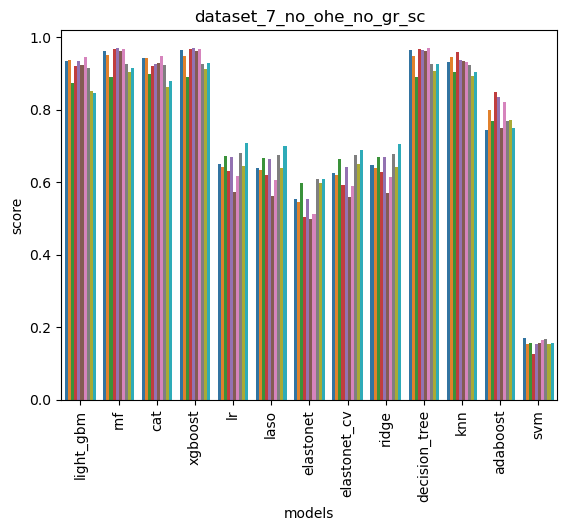

In [49]:
b = sns.barplot(x='models', y='value', hue = 'variable', data=cv_scores_df_with_sc_melt )
b.set_xticklabels(b.get_xticklabels(), rotation=90);
b.set_ylabel('score')
b.legend_.remove()
b.set_title('dataset_7_no_ohe_no_gr_sc')